# I. Intro & Problem Understanding

### Assignment Machine Learning

| Nama          | NIM |
|---------------|-----|
| Muhammad Iqbal Saputra | 2702390236 |
| Radit Arya Pradipta    | 2802446705 |
| Muhammad Reza Alghifari| 2802555044 |

Dataset diambil dari website Computer Sciences University of California Irvine [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)


Objective dari dataset ini adalah untuk memprediksi apakah nasabah akan gagal membayar tagihan kartu kreditnya atau tidak. Data asli tsb berasal dari sebuah bank besar di Taiwan yg mana dikumpulkan Yeh & Lien (2009) untuk diteliti

| Kolom                         | Deskripsi                                                                 |
|------------------------------|---------------------------------------------------------------------------|
| `ID`                         | ID unik untuk masing-masing klien (tidak berpengaruh dalam prediksi).     |
| `LIMIT_BAL`                  | Total jumlah kredit yang diberikan kepada klien (limit kartu kredit).     |
| `SEX`                        | Jenis kelamin (1 = laki-laki, 2 = perempuan).                             |
| `EDUCATION`                  | Tingkat pendidikan (1 = pascasarjana, 2 = sarjana, 3 = SMA, 4 = lainnya). |
| `MARRIAGE`                   | Status pernikahan (1 = menikah, 2 = lajang, 3 = lainnya).                |
| `AGE`                        | Usia klien (dalam tahun).                                                 |
| `PAY_0`                      | Status pembayaran bulan September 2005 (0 = tepat waktu, -1 = bayar penuh, 1 = menunggak 1 bulan, dst). |
| `PAY_2`                      | Status pembayaran bulan Agustus 2005 (sama seperti PAY_0).                |
| `PAY_3`                      | Status pembayaran bulan Juli 2005.                                        |
| `PAY_4`                      | Status pembayaran bulan Juni 2005.                                        |
| `PAY_5`                      | Status pembayaran bulan Mei 2005.                                         |
| `PAY_6`                      | Status pembayaran bulan April 2005.                                       |
| `BILL_AMT1`                  | Jumlah tagihan pada bulan September 2005.                                 |
| `BILL_AMT2`                  | Jumlah tagihan pada bulan Agustus 2005.                                   |
| `BILL_AMT3`                  | Jumlah tagihan pada bulan Juli 2005.                                      |
| `BILL_AMT4`                  | Jumlah tagihan pada bulan Juni 2005.                                      |
| `BILL_AMT5`                  | Jumlah tagihan pada bulan Mei 2005.                                       |
| `BILL_AMT6`                  | Jumlah tagihan pada bulan April 2005.                                     |
| `PAY_AMT1`                   | Jumlah pembayaran pada bulan September 2005.                              |
| `PAY_AMT2`                   | Jumlah pembayaran pada bulan Agustus 2005.                                |
| `PAY_AMT3`                   | Jumlah pembayaran pada bulan Juli 2005.                                   |
| `PAY_AMT4`                   | Jumlah pembayaran pada bulan Juni 2005.                                   |
| `PAY_AMT5`                   | Jumlah pembayaran pada bulan Mei 2005.                                    |
| `PAY_AMT6`                   | Jumlah pembayaran pada bulan April 2005.                                  |
| `default payment next month` | Target label: Apakah klien gagal bayar di bulan berikutnya? (1 = ya, 0 = tidak). |


# II. Data Collection & Loading

In [1]:
# Libraries data manipulation dan analisis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries pre-processing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE

# Libraries untuk model
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer

# Libraries untuk mengabaikan semua warning
import warnings
warnings.filterwarnings('ignore')

# Library tambahan
import time
start_time = time.time()

In [2]:
# Loading data
df = pd.read_excel('default_of_credit_card_clients.xlsx', header=1)
df.drop(columns=['ID'], inplace=True)

# df = pd.read_csv('bquxjob_b9948e1_196c2e30b57.csv')

In [3]:
# Cek 5 data teratas
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Cek 5 data terbawah
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

- Terdapat total ```30000 entry(row) data dengan 24 kolom data```  

- hanya 1 tipe data yang digunakan yaitu integer   

- Tidak Terdapat ```null values dalam data```  

# III. Data Cleaning (Pre-processing)

In [6]:
# Cek bentuk data
print(f'Bentuk data: {df.shape}')
df.columns.tolist()

Bentuk data: (30000, 24)


['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
# Cek missing value
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

*Data bersih dari missing value*

In [8]:
# Cek data duplikat
df.duplicated().sum()

35

*Terdapat 35 row data yang sama*

In [9]:
# Drop data duplikat
df.drop_duplicates(inplace=True)
print(f'Bentuk data setelah di drop: {df.shape}')

Bentuk data setelah di drop: (29965, 24)


In [10]:
# # Cek row yang bernilai 0
# bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
# pay_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
# target_cols = bill_cols + pay_cols

# # Hitung jumlah row
# rows_with_zero = (df[target_cols] == 0).any(axis=1).sum()

# # Drop rows yang punya setidaknya 1 nilai 0 di kolom target
# df = df[~(df[target_cols] == 0).any(axis=1)].reset_index(drop=True)

# print(f"Total: {rows_with_zero}")


In [11]:
df.shape

(29965, 24)

In [12]:
# Define numerical dan categorical columns
numerical_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_colunms = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# IV. Exploratory Data Analysis (EDA)

## IV.a Statistic Descriptive

In [13]:
# Cek deskripsi data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
EDUCATION,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
PAY_0,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0


📊 Descriptive Statistics Summary

1. Umum
- Jumlah data: **29.965 baris**
- Tidak ada missing values

---

1. Fitur Demografi

| Kolom       | Mean / Median | Insight                                                                 |
|-------------|----------------|-------------------------------------------------------------------------|
| `SEX`       | Mean = 1.60    | Mayoritas klien adalah **perempuan** (kode 2)                           |
| `EDUCATION` | Mean = 1.85    | Mayoritas klien adalah **lulusan sarjana/SMA**                          |
| `MARRIAGE`  | Mean = 1.55    | Mayoritas klien **menikah atau lajang**                                 |
| `AGE`       | Mean = 35.49   | Usia klien berkisar antara **21–79 tahun**, median = 34                 |

---

3. Fitur Finansial

| Kolom         | Mean          | Std Dev        | Max         | Insight                                                                 |
|---------------|---------------|----------------|-------------|-------------------------------------------------------------------------|
| `LIMIT_BAL`   | 167.442.000   | 129.760.135    | 1.000.000   | Limit kartu kredit sangat bervariasi, banyak outlier                    |
| `BILL_AMT1-6` | ~38–51 juta   | 59–73 juta     | Hingga 1.66M| Ada klien dengan tagihan sangat tinggi (indikasi high spenders/outlier) |
| `PAY_AMT1-6`  | ~4.800–5.900  | 15–23 juta     | Hingga 1.68M| Nilai pembayaran juga menunjukkan ketimpangan besar                     |

---

4. Histori Pembayaran (PAY_0 to PAY_6)

| Kolom  | Min | Median | Max | Insight                                                                 |
|--------|-----|--------|-----|-------------------------------------------------------------------------|
| `PAY_X`| -2  | -1     | 8   | Nilai -1 artinya pembayaran tepat waktu, nilai 0 artinya minimum paid, >0 = tunggakan. Nilai ekstrem (8) menandakan keterlambatan parah |

---

5. Target: `default payment next month`
- Mean = **0.221**
- Artinya: hanya **22,1%** dari klien yang gagal bayar (label = 1)
- Dataset **imbalanced** → perlu strategi seperti resampling saat modeling

---

1. Outlier Detection
- Kolom `LIMIT_BAL`, `BILL_AMTx`, `PAY_AMTx` menunjukkan nilai maksimum yang jauh dari Q3 dan deviasi standar besar
- Potensi **outlier ekstrim** sangat tinggi dan **perlu dihandle** saat preprocessing

---

🧠 Kesimpulan
- Dataset bersih dan lengkap (tanpa missing value)
- Distribusi data **cukup skewed dan mengandung banyak outlier**
- Target klasifikasi **imbalanced**
- Diperlukan langkah preprocessing ekstra seperti normalisasi, outlier removal, dan handling imbalance sebelum membuat model



## IV.b Data Skewness and Kurtosis

In [14]:
# Cek skewness & kurtosis data
skewness = df.skew()
kurtosis = df.kurtosis()
stats_df = pd.DataFrame({'skewness': skewness, 'kurtosis': kurtosis})
stats_df

,skewness,kurtosis
LIMIT_BAL,0.993491,0.537587
SEX,-0.424202,-1.820174
EDUCATION,0.970709,2.079207
MARRIAGE,-0.018591,-1.362806
AGE,0.732056,0.043988
PAY_0,0.734606,2.730038
PAY_2,0.792070,1.577609
PAY_3,0.841464,2.091666
PAY_4,1.000799,3.508962
PAY_5,1.009329,4.003562


📊 Summary Skewness dan Kurtosis

- **Skewness**
  - Skewness > 0 → data condong ke kanan (right-skewed)
  - Skewness -0.5 ≤ x ≤ 0.5 normal
  - Skewness < 0 → data condong ke kiri (left-skewed)
- **Kurtosis**
  - Normal kurtosis ≈ 3
  - Kurtosis > 3 → distribusi tajam, banyak outlier (leptokurtic)
  - Kurtosis < 3 → distribusi datar (platykurtic)

---

📈 Kolom dengan Skewness Tinggi (Right-Skewed)
Kolom berikut memiliki skewness **jauh di atas 1**, artinya data sangat condong ke kanan dan outlier besar kemungkinan terjadi:

| Kolom        | Skewness | Insight                                                              |
|--------------|----------|----------------------------------------------------------------------|
| PAY_AMT2     | 30.44    | Distribusi pembayaran bulan kedua sangat tidak normal               |
| PAY_AMT3     | 17.21    | Ada beberapa nilai ekstrim tinggi                                   |
| PAY_AMT1     | 14.66    | Mayoritas bayar kecil, sedikit yang bayar besar                     |
| PAY_AMT4-6   | 10–13    | Pola serupa, outlier kuat                                            |
| BILL_AMT1-6  | 2.6–3.1  | Tagihan bulanan sangat bervariasi dan skewed ke kanan               |
| PAY_4-6      | ≈1.0     | Ada keterlambatan ekstrim dari sebagian kecil klien                 |
| LIMIT_BAL    | 0.99     | Sebagian kecil klien punya limit sangat tinggi                      |

---

📊 Kolom dengan Kurtosis Tinggi (Tajam & Outlier Besar)
Kolom berikut memiliki kurtosis jauh lebih tinggi dari 3, artinya sangat tajam dan mengandung outlier ekstrem:

| Kolom        | Kurtosis | Insight                                                              |
|--------------|----------|----------------------------------------------------------------------|
| PAY_AMT2     | 1639.92  | Outlier sangat ekstrim                                               |
| PAY_AMT3     | 563.74   | Banyak nilai ekstrim di distribusi                                  |
| PAY_AMT1     | 414.85   | Sebagian kecil klien bayar sangat besar                             |
| PAY_AMT4-6   | 166–277  | Masih sangat tajam dan tidak normal                                  |
| BILL_AMT3    | 19.77    | Ada tagihan sangat besar yang mendistorsi distribusi                |
| BILL_AMT1-6  | 9.8–12.2 | Semua tagihan bulanan menunjukkan outlier                           |
| PAY_4-6      | 3.4–4.0  | Pembayaran tertunda ekstrim                                          |

---

⚖️ Kolom yang Hampir Simetris & Normal
| Kolom        | Skewness | Kurtosis | Insight                                      |
|--------------|----------|----------|----------------------------------------------|
| AGE          | 0.73     | ≈0.04    | Hampir normal, sedikit skew ke kanan         |
| EDUCATION    | 0.97     | 2.08     | Agak skewed tapi masih bisa ditoleransi      |
| default_payment | 1.34  | ≈ -0.20  | Target label agak skewed, tapi kurtosis rendah|

---

🔍 Catatan Penting
- **PAY_AMT** & **BILL_AMT** kolom sangat skewed dan leptokurtic → **perlu transformasi** (contoh: log transform) sebelum modeling.
- Data **tidak normal**, jadi algoritma yang mengasumsikan normalitas (seperti Linear Regression) mungkin kurang cocok tanpa preprocessing.
- Perlu juga pertimbangkan **robust scaler** daripada standar scaler.

---

Kesimpulan
- Kita akan menggunakan `MinMaxScaler` untuk fitur dengan skewness > 1
- Visualisasi distribusi (histogram/boxplot) untuk melihat bentuk dan outlier
- Pertimbangkan teknik sampling karena target `default_payment` juga skewed



## IV.c Distribution Visualization

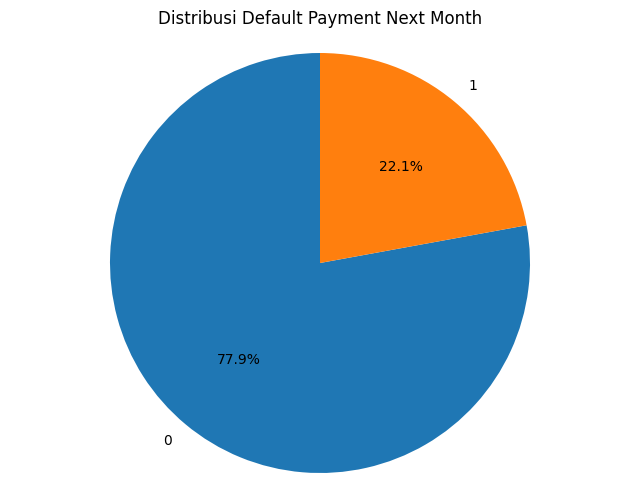

In [15]:
# Cek distribusi kolom `default payment next month`
counts = df['default payment next month'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Default Payment Next Month')
plt.axis('equal')
plt.show()

Fitur target imbalance
`1 = gagal bayar`
`0 = bayar`
Perlu dilakukan resampling agar data tidak bias ketika predict

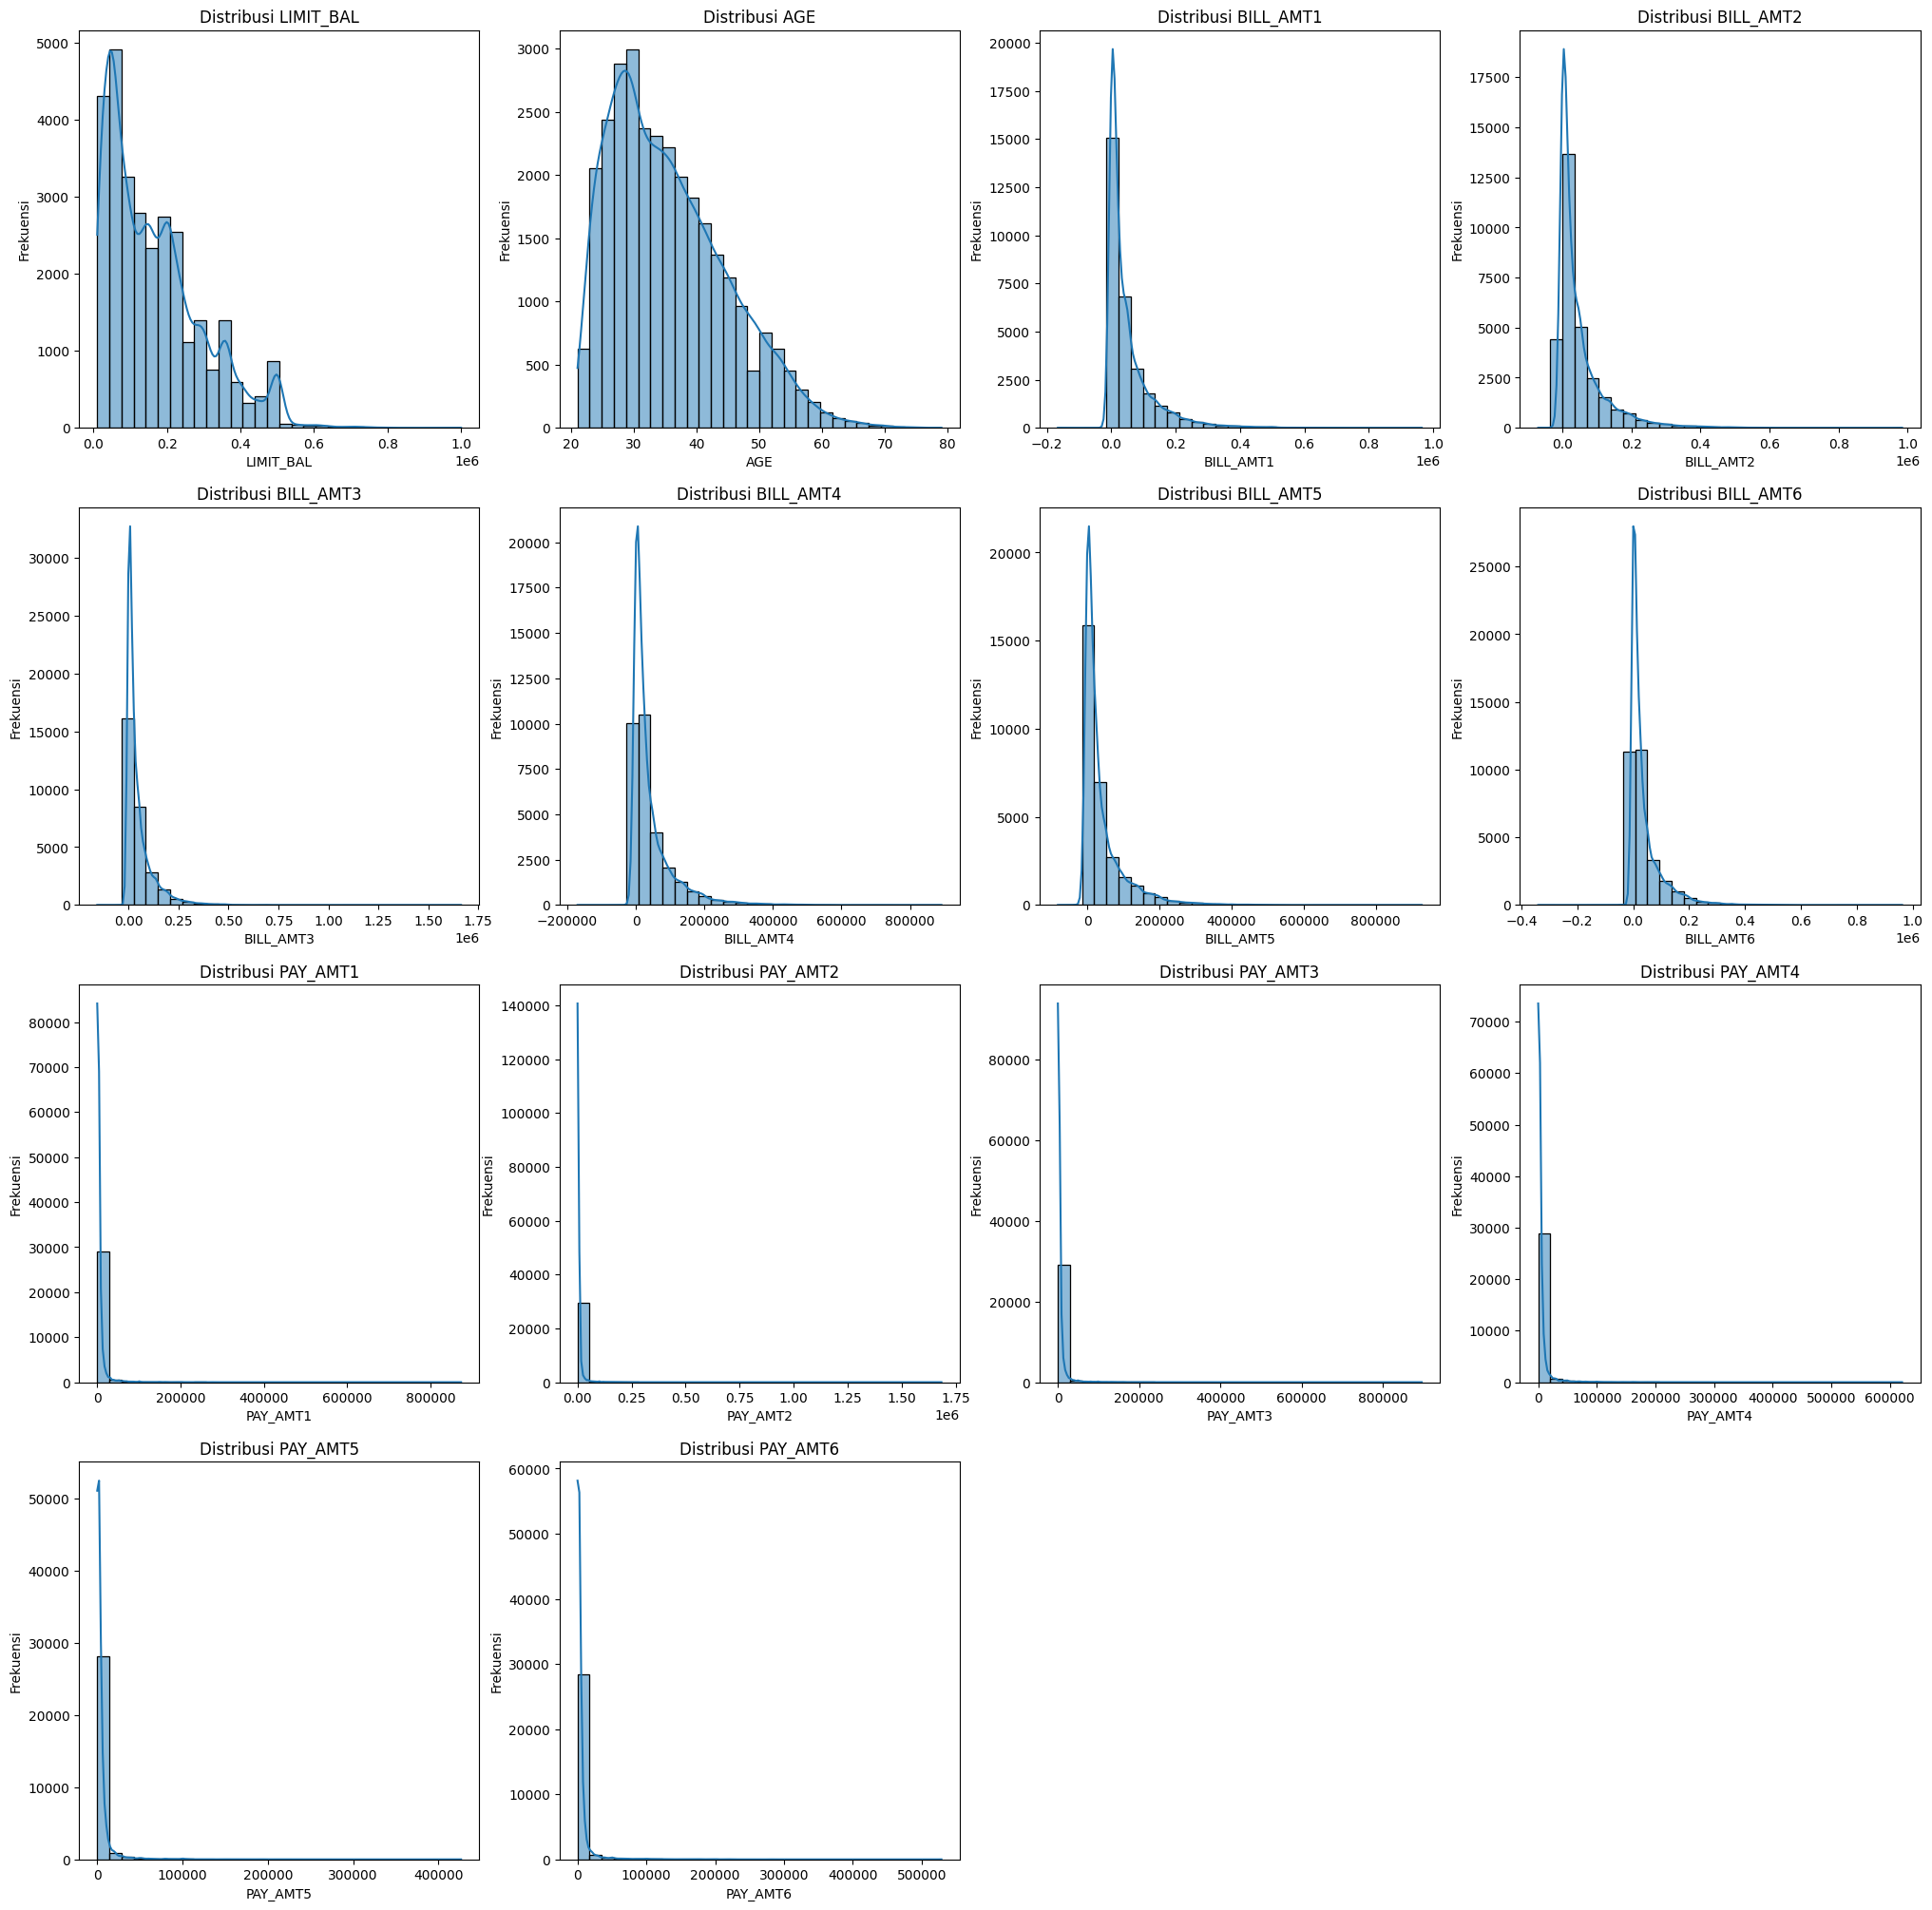

In [16]:
# Cek distribusi kolom numerik
plt.figure(figsize=(25, 25))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

📊 Insight Visual Distribusi Numerical Features

 📝 Catatan Umum
Distribusi fitur numerik dalam dataset ini umumnya **tidak normal**, ditandai dengan skewness tinggi dan outlier signifikan, terutama pada fitur keuangan seperti `BILL_AMT` dan `PAY_AMT`.

---

 🔹 LIMIT_BAL (Limit Kartu Kredit)
- **Skewness: 0.99** → moderately right-skewed
- Mayoritas nasabah memiliki limit < 200.000
- Hanya sedikit yang limitnya mendekati 1 juta
- ⚠️ Distribusi tidak normal

---

 🔹 AGE (Usia)
- **Skewness: 0.73** → moderately skewed ke kanan
- Umur terbanyak antara 30–35 tahun
- Usia minimum 21, maksimum 79
- ✅ Hampir normal

---

🔹 BILL_AMT1 hingga BILL_AMT6 (Tagihan Bulanan)

| Kolom     | Skewness | Distribusi     | Insight                                                                 |
|-----------|----------|----------------|-------------------------------------------------------------------------|
| BILL_AMT1 | 2.66     | Sangat skewed  | Banyak tagihan rendah, sedikit yang ekstrem tinggi                     |
| BILL_AMT2 | 2.70     | Sangat skewed  | Mirip dengan bulan sebelumnya                                           |
| BILL_AMT3 | 3.09     | Ekstrem skewed | Kemungkinan besar outlier memengaruhi distribusi                       |
| BILL_AMT4 | 2.82     | Sangat skewed  | Sebagian besar data menumpuk di angka rendah                           |
| BILL_AMT5 | 2.87     | Sangat skewed  | Konsisten dengan bulan lainnya                                          |
| BILL_AMT6 | 2.85     | Sangat skewed  | Beberapa nilai negatif perlu investigasi lebih lanjut                  |

- ⚠️ Tidak normal, banyak outlier
- 🧠 Distribusi ini mencerminkan mayoritas pengguna dengan tagihan rendah tapi beberapa dengan tagihan ekstrem

---

🔹 PAY_AMT1 hingga PAY_AMT6 (Pembayaran Bulanan)

| Kolom     | Skewness | Distribusi       | Insight                                                               |
|-----------|----------|------------------|-----------------------------------------------------------------------|
| PAY_AMT1  | 14.66    | Ekstrem skewed   | Banyak nilai = 0, hanya sedikit yang membayar dalam jumlah besar     |
| PAY_AMT2  | 30.44    | Ekstrem skewed   | Nilai nol mendominasi                                                |
| PAY_AMT3  | 17.21    | Ekstrem skewed   | Outlier mendominasi distribusi                                       |
| PAY_AMT4  | 12.90    | Ekstrem skewed   | Distribusi berat ke kanan, nilai besar jarang                        |
| PAY_AMT5  | 11.12    | Ekstrem skewed   | Sebagian besar data adalah non-pembayar                              |
| PAY_AMT6  | 10.63    | Ekstrem skewed   | Tren yang sama dengan bulan lain                                     |

- ⚠️ Tidak normal, sparsity tinggi
- 🧠 Mayoritas klien tidak membayar (nilai = 0), jika tidak dilakukan resampling/balancing data. model cenderung akan bias predict majority

---

🔚 Kesimpulan Umum
| Kategori Fitur | Distribusi          | Saran Sementara                                  |
|----------------|---------------------|--------------------------------------------------|
| `AGE`          | Hampir normal       | Bisa dipakai langsung untuk modeling             |
| `LIMIT_BAL`    | Skewed moderat      | Perlu penanganan outlier, scaling                |
| `BILL_AMT`     | Highly skewed       | Banyak outlier, sebaiknya distandarisasi         |
| `PAY_AMT`      | Ekstrem skewed      | Perlu perhatian khusus (outlier & sparsity)      |

> 💡 Semua fitur numerik kecuali `AGE` menunjukkan distribusi tidak normal. Perlu dihandle lebih lanjut

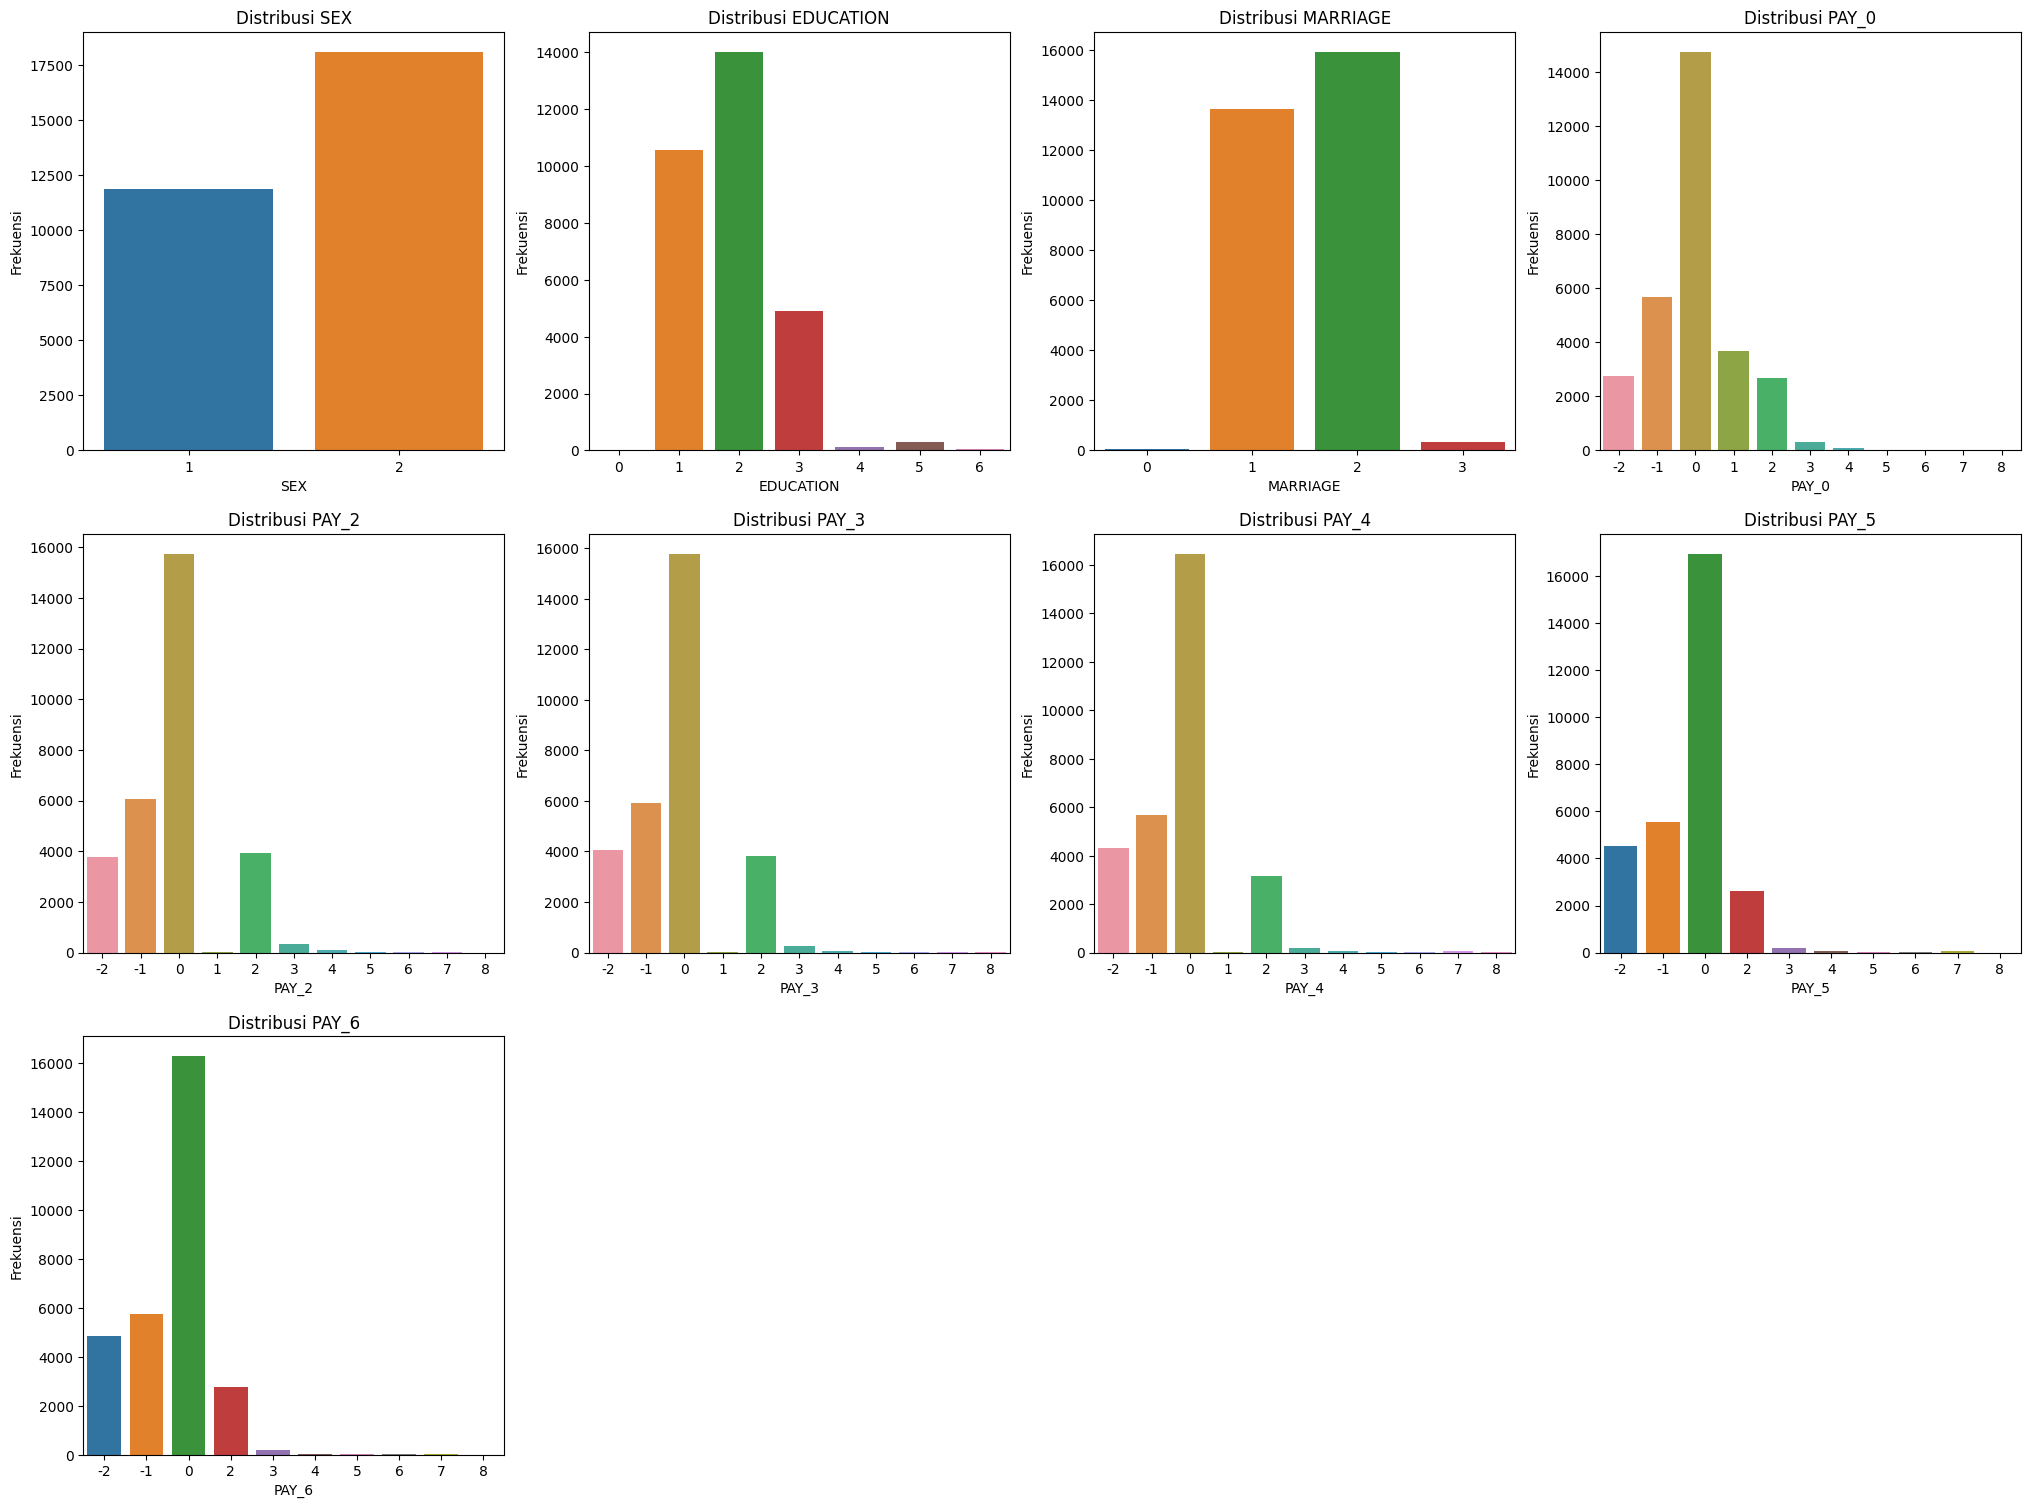

In [17]:
# Cek distribusi kolom kategorikal
plt.figure(figsize=(25, 25))
for i, col in enumerate(categorical_colunms):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

 📊 Insight Visualisasi Categorical Features

 🔹 SEX (Jenis Kelamin)
- Kategori:
  - 1 = Laki-laki
  - 2 = Perempuan
- Mayoritas nasabah adalah **perempuan**
- Perbandingan sekitar 60:40 (Perempuan:Laki-laki)

---

 🔹 EDUCATION (Tingkat Pendidikan)
- Kategori umum:
  - 1 = Pascasarjana
  - 2 = Sarjana
  - 3 = SMA
  - 4/5/6/0 = Lainnya / Tidak jelas
- Mayoritas nasabah berada di tingkat pendidikan **sarjana (2)** dan **SMA (3)**

---

 🔹 MARRIAGE (Status Pernikahan)
- Kategori:
  - 1 = Menikah
  - 2 = Lajang
  - 3 = Lainnya
- Mayoritas nasabah adalah **lajang (2)** dan **menikah (1)**
- Kategori 3 sangat sedikit

---

 🔹 PAY_0 hingga PAY_6 (Status Pembayaran Bulanan)
- Nilai -2 = tidak ada informasi, -1 = membayar tepat waktu, 0 = tidak telat, 1–8 = keterlambatan bulan
- **Mayoritas nasabah membayar tepat waktu** (`-1`) atau tidak telat (`0`) di setiap bulan
- Jumlah keterlambatan (`>=1`) makin sedikit seiring meningkatnya jumlah bulan keterlambatan
- Terlihat bahwa distribusi status keterlambatan cukup **konsisten** dari PAY_0 hingga PAY_6
- 🧠 Insight:
  - Fitur ini mencerminkan **kedisiplinan nasabah**
  - Bisa direkayasa menjadi fitur tambahan seperti "jumlah bulan menunggak" atau "pernah telat"




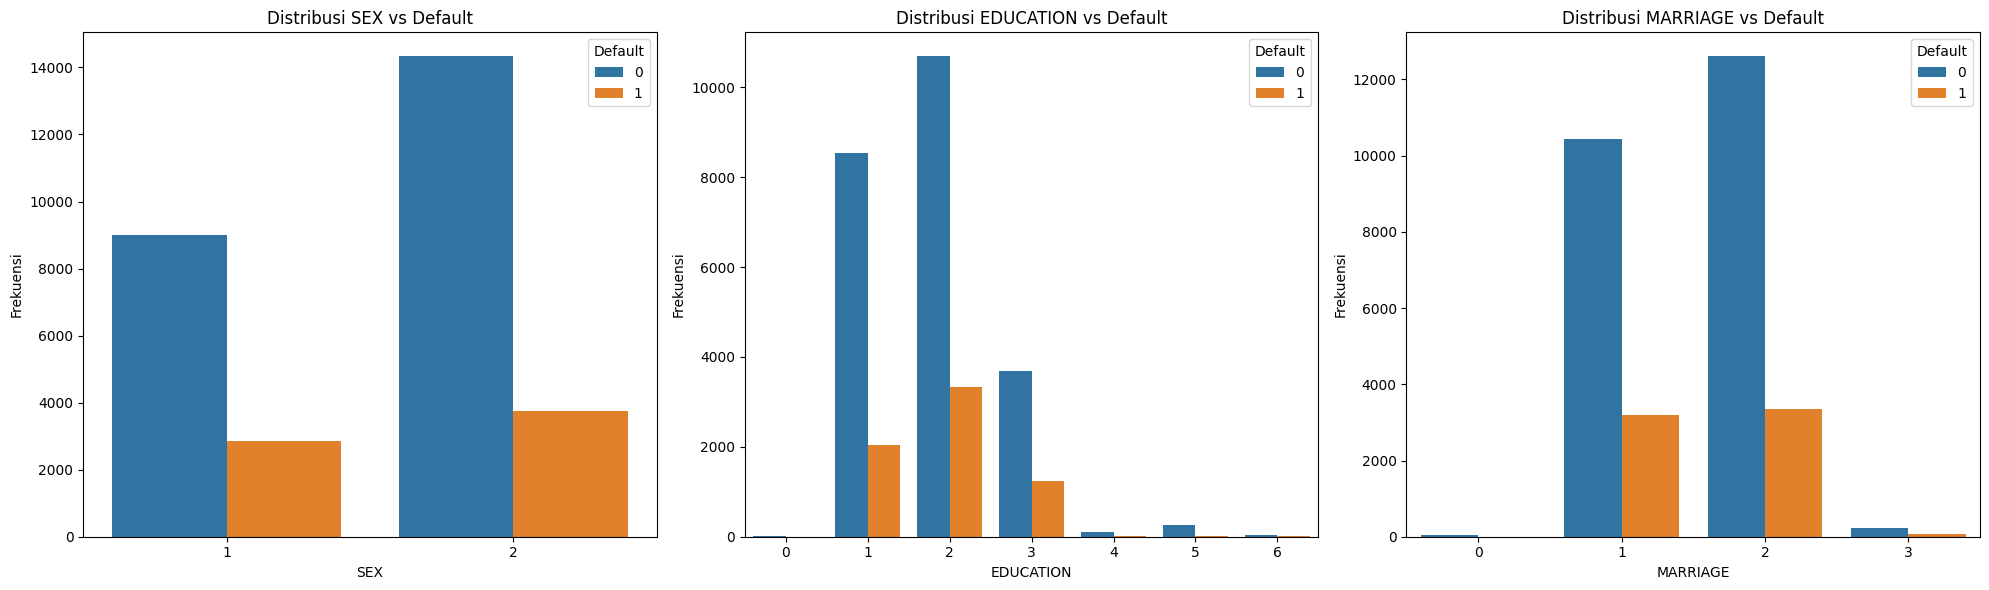

In [18]:
# Cek relationship kolom categorical dengan target
categorical_colunms_and_target = ['SEX','EDUCATION', 'MARRIAGE']
fig, axes = plt.subplots(1, len(categorical_colunms_and_target), figsize=(20, 6))

for i, col in enumerate(categorical_colunms_and_target):
    sns.countplot(x=col, hue='default payment next month', data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col} vs Default')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].legend(title='Default', loc='upper right')

plt.tight_layout()
plt.show()

📊 Insight Relationship between Categorical Column and Target

 🔹 1. SEX vs Default
- Kategori 1 = Laki-laki, 2 = Perempuan
- **Perempuan (2)** lebih banyak jumlahnya dibanding laki-laki
- Namun, proporsi **gagal bayar (default)** terlihat sedikit lebih tinggi pada **perempuan**
- 🧠 Insight: Jenis kelamin perempuan sedikit lebih dominan dalam populasi dan juga kontribusi **gagal bayar**

---

 🔹 2. EDUCATION vs Default
- Kategori:
  - 1 = Pascasarjana
  - 2 = Sarjana
  - 3 = SMA
  - 0, 4, 5, 6 = Tidak jelas / lainnya
- Mayoritas nasabah berada di tingkat **sarjana (2)** dan **SMA (3)**
- Jumlah default paling banyak terjadi pada pendidikan **sarjana**, tapi ini wajar karena populasi terbanyak juga dari sana
- Namun, proporsi default dari kelompok **SMA (3)** terlihat **lebih tinggi secara visual**
- 🧠 Insight: Meskipun sarjana paling banyak, kelompok SMA mungkin punya **risiko gagal bayar lebih besar secara proporsional**

---

 🔹 3. MARRIAGE vs Default
- Kategori:
  - 1 = Menikah
  - 2 = Lajang
  - 3 = Lainnya
- Jumlah nasabah paling banyak adalah yang **lajang (2)**, disusul **menikah (1)**
- Default tersebar cukup seimbang antara keduanya, meskipun terlihat **sedikit lebih tinggi pada lajang**
- Kategori 3 sangat kecil dan bisa dipertimbangkan untuk digabung sebagai "lainnya"
- 🧠 Insight: Status lajang sedikit lebih berisiko terhadap default — mungkin karena tanggungan ekonomi lebih ringan tapi disiplin finansial lebih rendah?

---

 🔚 Kesimpulan
- Semua fitur kategorikal menunjukkan bahwa **gagal bayar tidak terjadi merata**, tapi dipengaruhi oleh karakteristik demografi
- **Kelompok risiko default yang lebih tinggi (secara proporsional):**
  - Perempuan
  - Pendidikan SMA
  - Status lajang

## IV.d Outlier detection

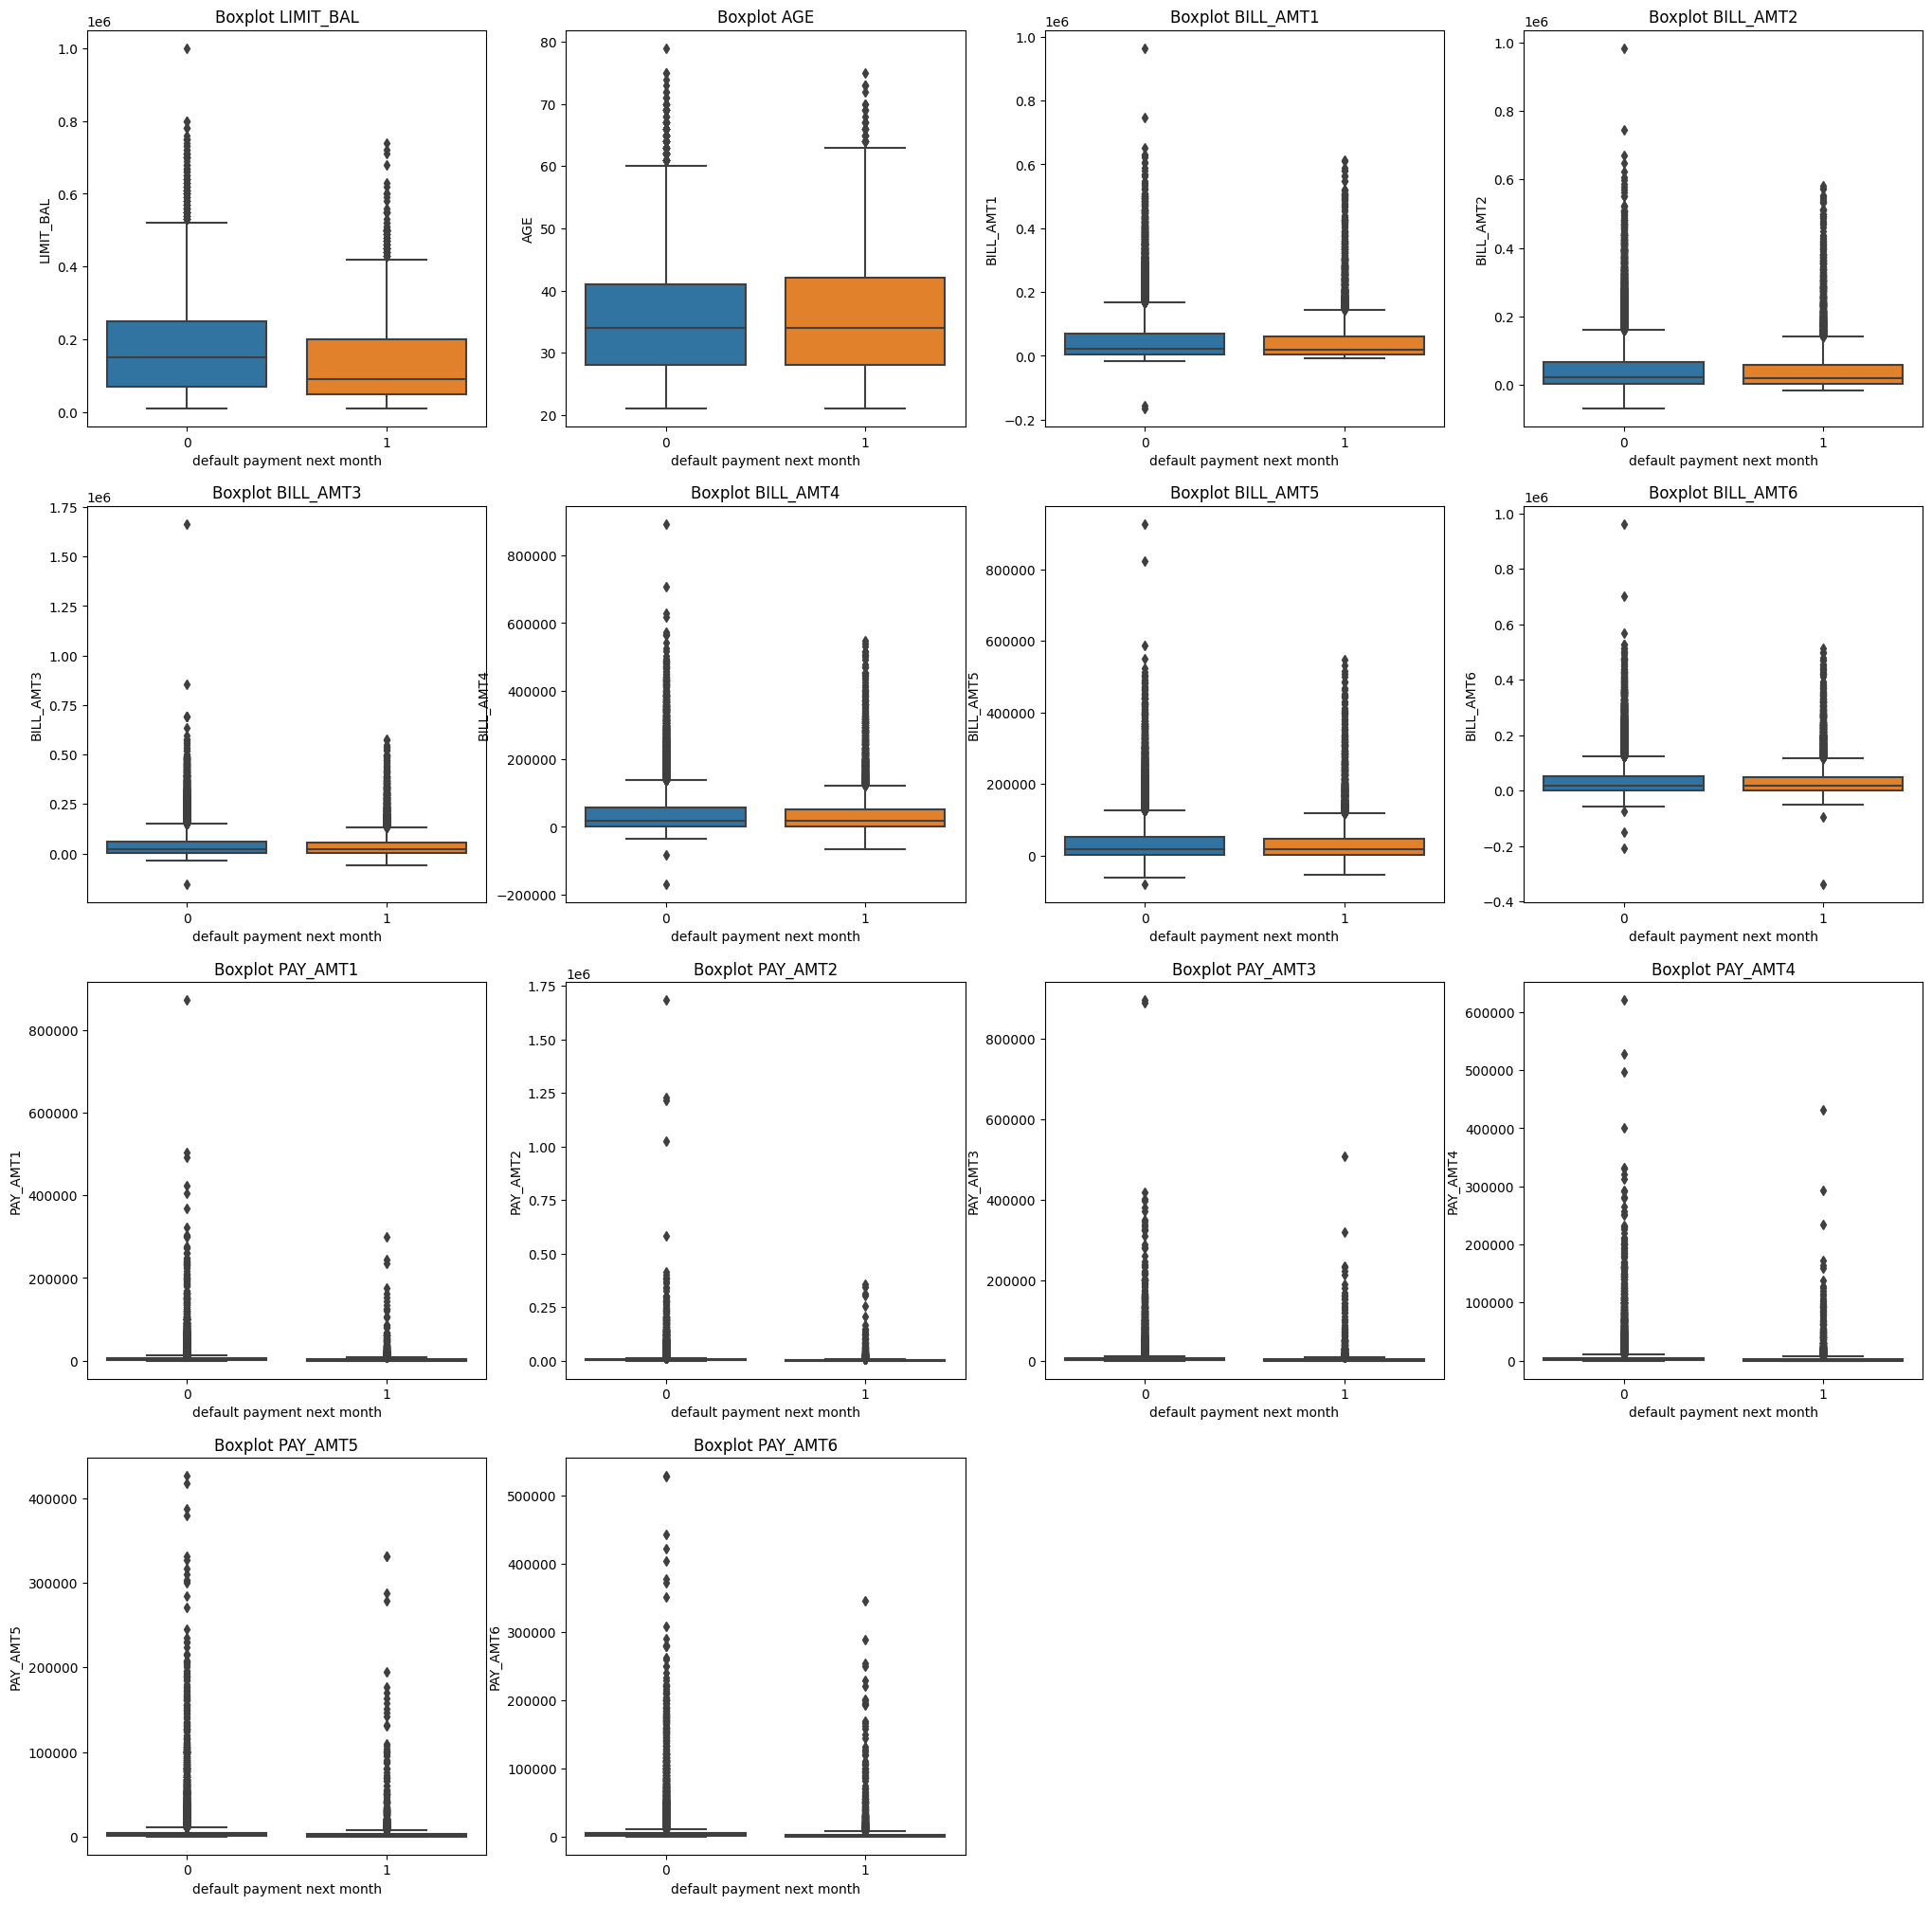

In [19]:
# Visualisasi boxplot untuk kolom numerik
plt.figure(figsize=(25, 25))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df['default payment next month'],y=col, data=df)
    plt.title(f'Boxplot {col}')

📦 Insight Outlier Detection & Distribusi Berdasarkan Target (`default payment next month`)

Objective:
- Mendeteksi outlier pada fitur numerik
- Membandingkan distribusi nilai antara nasabah yang **default (1)** dan yang **tidak default (0)**

---

 🔹 LIMIT_BAL (Limit Kredit)
- Nasabah **yang default (1)** memiliki median limit yang **lebih rendah** dibandingkan yang tidak default.
- Outlier terlihat pada dua kelompok, tapi lebih ekstrem di non-default.
- 🧠 Insight: Limit rendah dapat dikaitkan dengan risiko gagal bayar yang lebih tinggi.

---

 🔹 AGE (Usia)
- Median usia nasabah yang default sedikit **lebih muda** dibanding non-default.
- Sebaran usia relatif mirip, namun beberapa outlier terlihat di usia lebih tua.
- 🧠 Insight: Nasabah muda cenderung memiliki risiko default sedikit lebih tinggi.

---

 🔹 BILL_AMT1–6 (Tagihan per Bulan)
- Kedua kelompok menunjukkan **outlier ekstrem**, terutama di atas Q3.
- Tidak ada perbedaan median yang signifikan, tapi default cenderung memiliki **tagihan sedikit lebih rendah**.
- 🧠 Insight: Meskipun tagihan lebih kecil, beberapa nasabah tetap gagal bayar → indikasi manajemen keuangan buruk.

---

 🔹 PAY_AMT1–6 (Pembayaran per Bulan)
- Kelompok default menunjukkan **nilai pembayaran yang lebih rendah secara konsisten**.
- Banyak nasabah default yang tidak membayar sama sekali (nilai = 0).
- Outlier ekstrem ditemukan di non-default (pembayaran besar).
- 🧠 Insight: Fitur `PAY_AMT` berpotensi kuat untuk membedakan perilaku pembayaran.

---

 📌 Kesimpulan Umum
- Fitur numerik menunjukkan banyak **outlier**, terutama pada fitur keuangan.
- Kelompok yang **gagal bayar** cenderung:
  - Memiliki **limit kredit lebih rendah**
  - **Lebih muda** secara usia
  - **Membayar lebih kecil atau tidak membayar**
- ⚠️ Fitur seperti `LIMIT_BAL`, `AGE`, dan `PAY_AMT` memiliki potensi kuat untuk klasifikasi default

> 💡 Insight for feature engineering: Kita bisa membuat feature baru seperti *"pernah tidak membayar"*, *"total tagihan rata-rata"*, atau *"rasio pembayaran terhadap tagihan"* untuk memperkuat model



## IV.e Heatmap

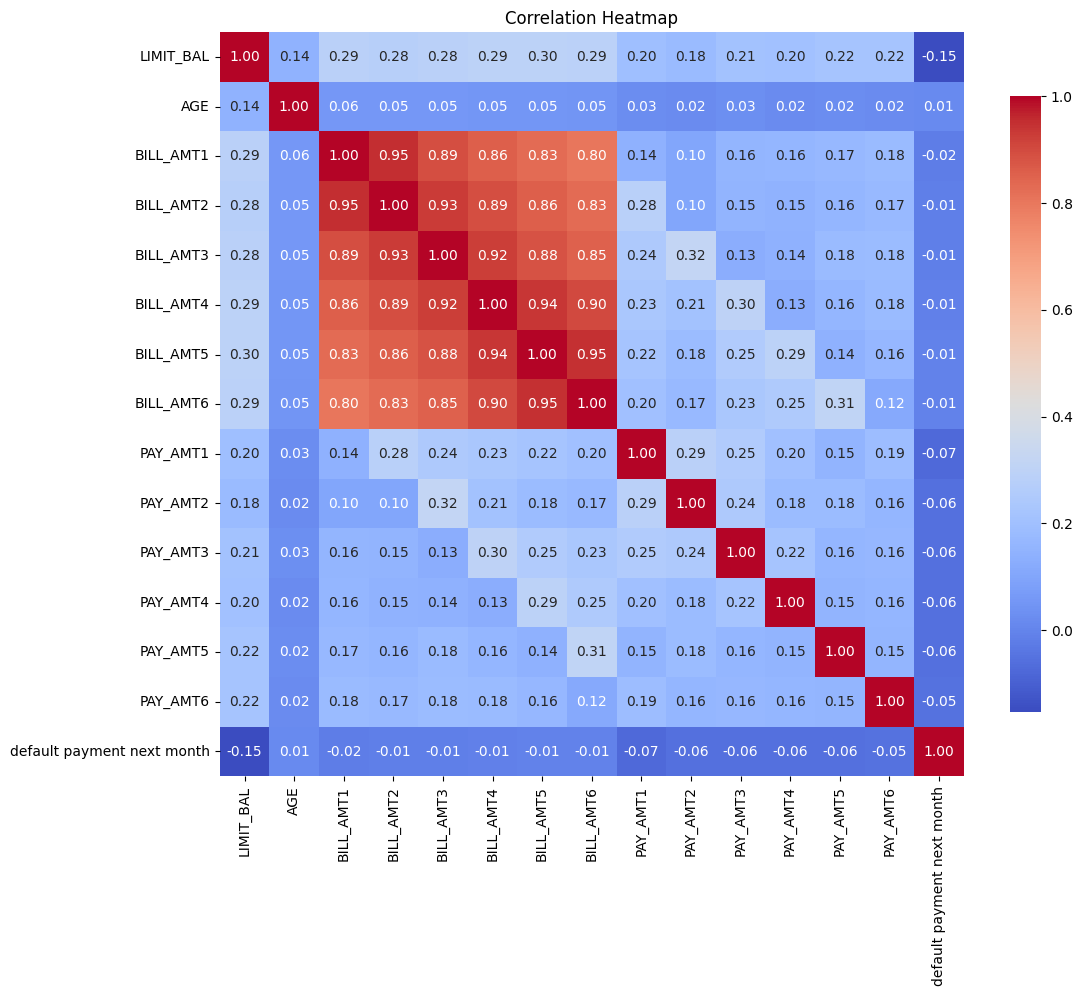

In [20]:
# Visualisasi heatmap
corr_matrix = df[numerical_columns + ['default payment next month']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

🔥 Insight Heatmap Correlation

Objective
- Mengukur hubungan linier antar fitur numerik
- Menilai sejauh mana masing-masing fitur berkorelasi dengan target: `default payment next month`

---

📈 Korelasi Terhadap Target (`default payment next month`)

| Fitur             | Korelasi  | Interpretasi Singkat                                         |
|------------------|-----------|--------------------------------------------------------------|
| LIMIT_BAL        | **-0.15** | Semakin tinggi limit kredit, semakin kecil kemungkinan default |
| PAY_AMT1 – 6     | -0.05 s/d -0.07 | Semakin banyak pembayaran dilakukan, semakin kecil risiko default |
| BILL_AMT1 – 6    | ~ -0.01   | Hampir tidak ada pengaruh linier langsung terhadap default   |
| AGE              | 0.01      | Tidak berkorelasi signifikan dengan default                 |

> 💡 **Catatan:** Semua korelasi ke target berada di bawah |0.2| → tidak ada fitur numerik tunggal yang dominan secara linier dalam menjelaskan default.

---

🔄 Korelasi Antar Fitur
- `BILL_AMT1 – BILL_AMT6` memiliki korelasi **sangat tinggi** satu sama lain (0.80 – 0.95)
- `PAY_AMT1 – PAY_AMT6` juga menunjukkan korelasi menengah hingga tinggi (0.15 – 0.31)
- Ini mengindikasikan adanya **multikolinearitas** antar fitur dalam satu grup

---

🧠 Insight Utama
- Fitur `LIMIT_BAL` adalah prediktor numerik **terkuat secara linier** terhadap default
- Jumlah pembayaran (`PAY_AMT`) memiliki korelasi negatif terhadap default → masuk akal, semakin banyak membayar, makin kecil risiko gagal bayar
- Fitur `AGE` dan `BILL_AMT` tidak memberikan sinyal linier yang kuat terhadap default
- Korelasi antar `BILL_AMT` dan antar `PAY_AMT` sangat tinggi → ada potensi untuk:
  - **Menggabungkan** fitur-fitur ini (misal: `total_bill`, `avg_payment`)
  - **Menghindari multikolinearitas** dengan seleksi fitur

---

🔧 Lanjutan
- **feature engineering** berbasis gabungan dan rasio:
  - `total_pay_amt = sum(PAY_AMT1–6)`
  - `pay_ratio = total_pay_amt / total_bill_amt`
  - `missed_payment_flag = 1 if any PAY_AMT == 0 else 0`
- Bisa gunakan (PCA) jika ingin menghindari redundant features

# V.  Feature Engineering 

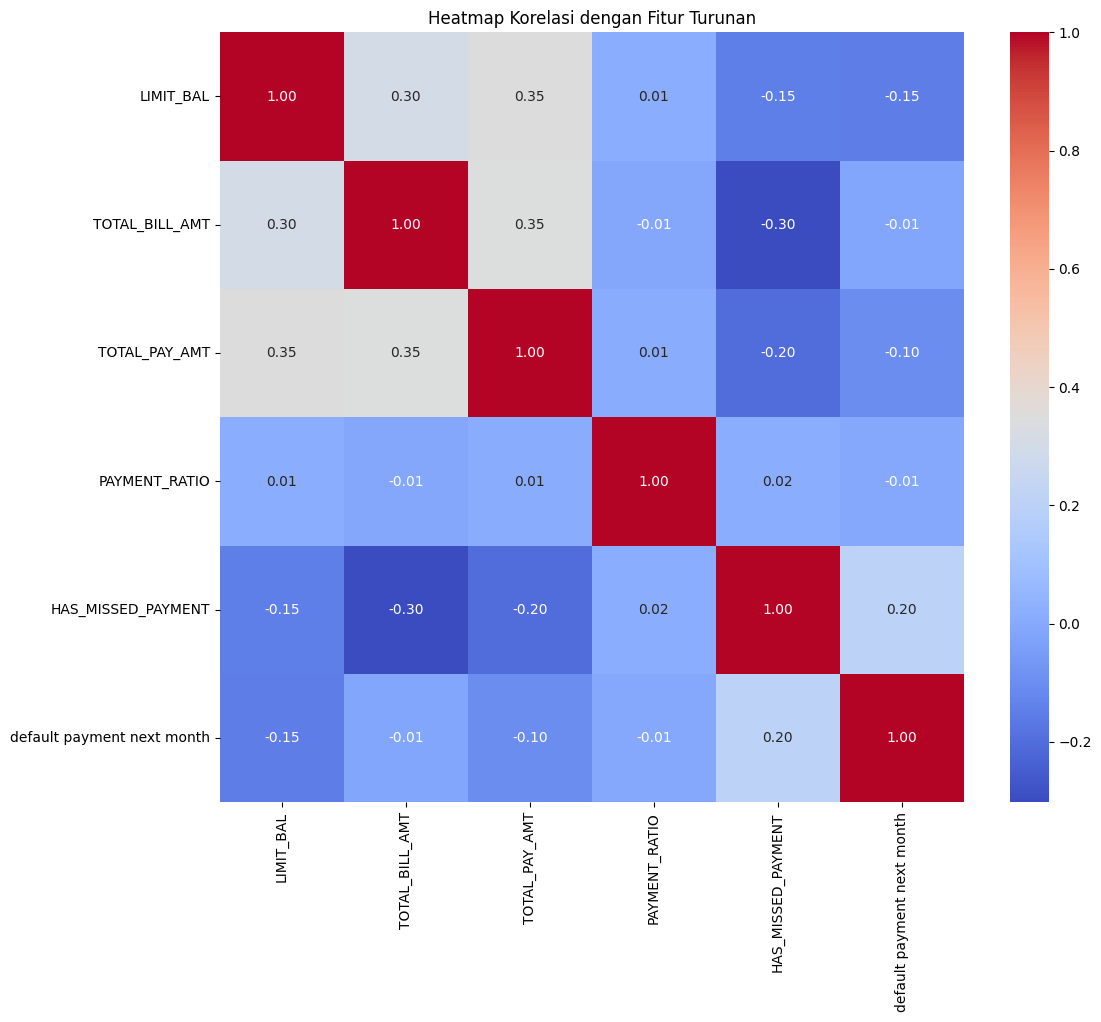

In [21]:
# Fitur tambahan
df['TOTAL_BILL_AMT'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].abs().sum(axis=1)
df['TOTAL_PAY_AMT'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].abs().sum(axis=1)
df['PAYMENT_RATIO'] = df['TOTAL_PAY_AMT'] / df['TOTAL_BILL_AMT'].replace(0, 1)  # hindari div-by-zero
df['HAS_MISSED_PAYMENT'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].apply(lambda row: 1 if (row == 0).any() else 0, axis=1)
additional_numerical_columns = ['LIMIT_BAL','TOTAL_BILL_AMT', 'TOTAL_PAY_AMT', 'PAYMENT_RATIO', 'HAS_MISSED_PAYMENT']

# Visualisasi heatmap ulang dengan fitur tambahan
plt.figure(figsize=(12, 10))
sns.heatmap(df[additional_numerical_columns + ['default payment next month']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi dengan Fitur Turunan')
plt.show()


In [22]:
df[['TOTAL_BILL_AMT', 'TOTAL_PAY_AMT', 'PAYMENT_RATIO', 'HAS_MISSED_PAYMENT']].describe().T

,count,mean,std,min,25%,50%,75%,max
TOTAL_BILL_AMT,29965.0,270626.635208,379581.911372,0.0,29662.000000,126911.000000,343148.00000,5263883.0
TOTAL_PAY_AMT,29965.0,31687.783848,60853.841129,0.0,6700.000000,14400.000000,33600.00000,3764066.0
PAYMENT_RATIO,29965.0,20.900405,1256.208136,0.0,0.041329,0.088057,0.60083,162000.0
HAS_MISSED_PAYMENT,29965.0,0.484265,0.499761,0.0,0.000000,0.000000,1.00000,1.0


📊 Insight Heatmap 

🎯 Tujuan
Melihat seberapa kuat hubungan antara fitur-fitur terpilih dengan target `default payment next month`, setelah proses pembersihan data dan feature engineering.

---

✅ Korelasi Terhadap Target

| Fitur                 | Korelasi    | Interpretasi                                                                 |
|-----------------------|-------------|------------------------------------------------------------------------------|
| `HAS_MISSED_PAYMENT`  | **+0.20**   | Fitur paling kuat korelasinya ke default. Semakin sering gagal bayar → makin tinggi risiko default |
| `TOTAL_PAY_AMT`       | **-0.10**   | Semakin besar total pembayaran → makin kecil kemungkinan default            |
| `LIMIT_BAL`           | **-0.15**   | Limit kredit tinggi berasosiasi dengan risiko gagal bayar yang lebih rendah |
| `TOTAL_BILL_AMT`      | **-0.01**   | Korelasi sangat kecil → bisa jadi tidak terlalu berguna                     |
| `PAYMENT_RATIO`       | **-0.01**   | Rasio pembayaran terhadap tagihan tidak berkorelasi secara linier           |

---

🔄 Korelasi Antar Fitur

| Fitur A               | Fitur B             | Korelasi | Catatan                           |
|-----------------------|---------------------|----------|-----------------------------------|
| `TOTAL_PAY_AMT`       | `LIMIT_BAL`         | +0.35    | Masuk akal: nasabah limit besar cenderung membayar lebih besar |
| `TOTAL_PAY_AMT`       | `TOTAL_BILL_AMT`    | +0.35    | Tinggi tagihan berbanding lurus dengan pembayaran |
| `HAS_MISSED_PAYMENT`  | `TOTAL_BILL_AMT`    | **-0.30**| Semakin sering missed → total tagihan lebih kecil |
| `HAS_MISSED_PAYMENT`  | `TOTAL_PAY_AMT`     | **-0.20**| Semakin sering missed → pembayaran menurun juga  |

---

🧠 Insight Utama

- `HAS_MISSED_PAYMENT` adalah fitur paling **informatif** dan **mudah dipahami** secara bisnis (misal: warning flag untuk credit scoring).
- `LIMIT_BAL` dan `TOTAL_PAY_AMT` juga tetap punya kontribusi meski tidak dominan secara individu.
- Korelasi `PAYMENT_RATIO` ternyata lemah → mungkin karena outlier atau distribusi berat sebelah.
- `TOTAL_BILL_AMT` tidak terlalu membantu membedakan default.

---

🎯 Rekomendasi

- Prioritaskan:
  - ✅ `HAS_MISSED_PAYMENT`
  - ✅ `TOTAL_PAY_AMT`
  - ✅ `LIMIT_BAL`
- Jadikan heatmap ini sebagai dasar untuk **feature selection** sebelum modeling
- Gunakan ini sebagai input awal untuk **model interpretatif** seperti Logistic Regression, lalu konfirmasi dengan **feature importance dari Random Forest**



# VI. Pre-processing & Train-Test Split

## VI.a Checking Cardinality

In [23]:
# Memfilter hanya kolom kategorikal ke dalam variabel
kolom_kat = df.select_dtypes(include=['object', 'datetime64']).columns.to_list()

# Declare unique data
kat_unique_data = []

# Melakukan loop pada setiap kolom kategorikal dan menghitung nilai unik, lalu menambahkan hasil perhitungan ke dalam daftar kosong
for kolom in kolom_kat:
    kat_unique_data.append([kolom, df[kolom].nunique()])

# Menampilkan dataframe
pd.DataFrame(data=kat_unique_data, columns=['kolom_kategorikal', 'unique_value'])

,kolom_kategorikal,unique_value


**Penjelasan**  
tidak muncul karena semua data adalah numerikal jadi tahap check cardinality tidak di lanjutkan

## VI.b Split Train-Test

In [24]:
# Split target dan fitur
X = df.drop(columns=['default payment next month'], axis=1)         # X sebagai fitur(targeted columns)
y = df['default payment next month']                                # y sebagai target (Price Column)

In [25]:
# Split Train dan test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)


# Cek size Train dan Test
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (23972, 27)
X test shape: (5993, 27)
y train shape: (23972,)
y test shape: (5993,)


## VI.c Handling Outlier

In [26]:
# Tambah feature baru ke numerical_columns
numerical_columns += ['TOTAL_BILL_AMT', 'TOTAL_PAY_AMT', 'PAYMENT_RATIO', 'HAS_MISSED_PAYMENT']

In [27]:
# Drop kolom yang tidak ingin kita winsorize
winsor_cols = [col for col in numerical_columns if col not in ['AGE', 'HAS_MISSED_PAYMENT']]

# Inisialisasi Winsorizer
winsor = Winsorizer(capping_method='iqr',
                    tail='both',
                    fold=1.5,
                    variables=winsor_cols)

X_train_winsor = winsor.fit_transform(X_train)
X_test_winsor = winsor.transform(X_test)

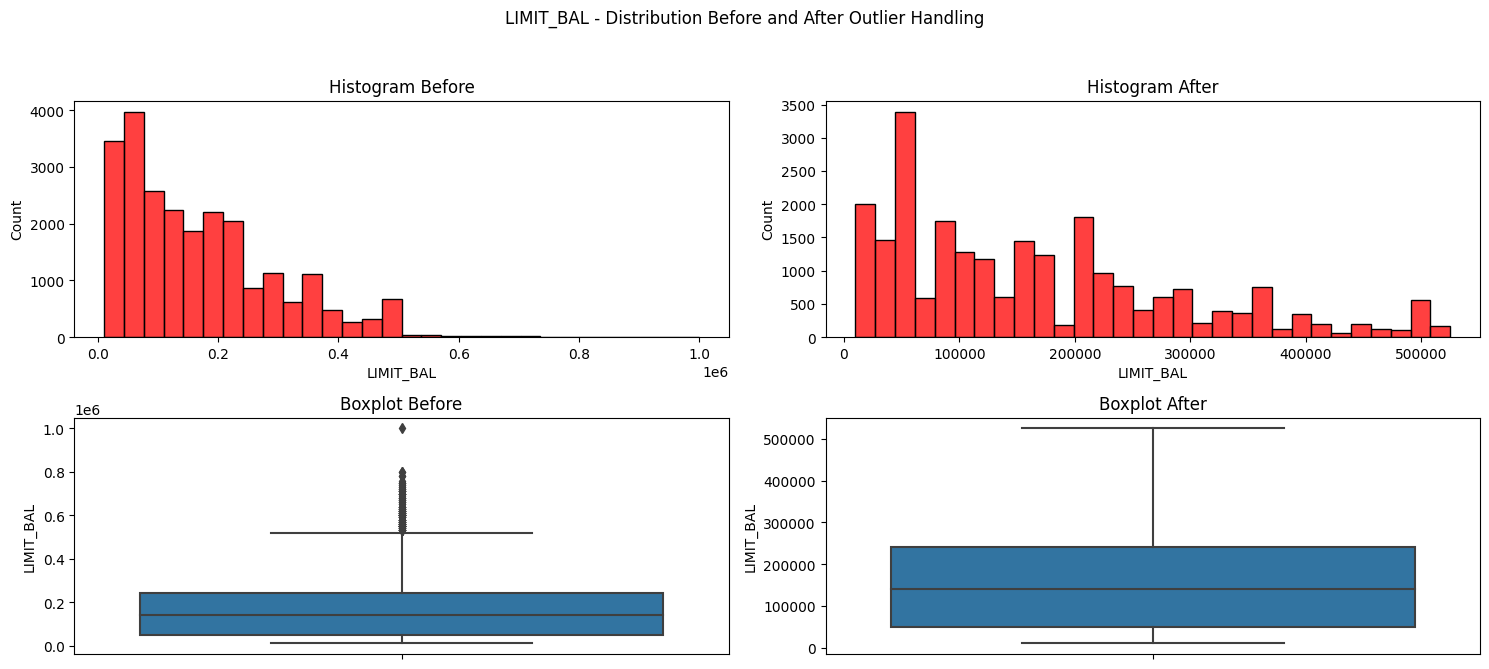

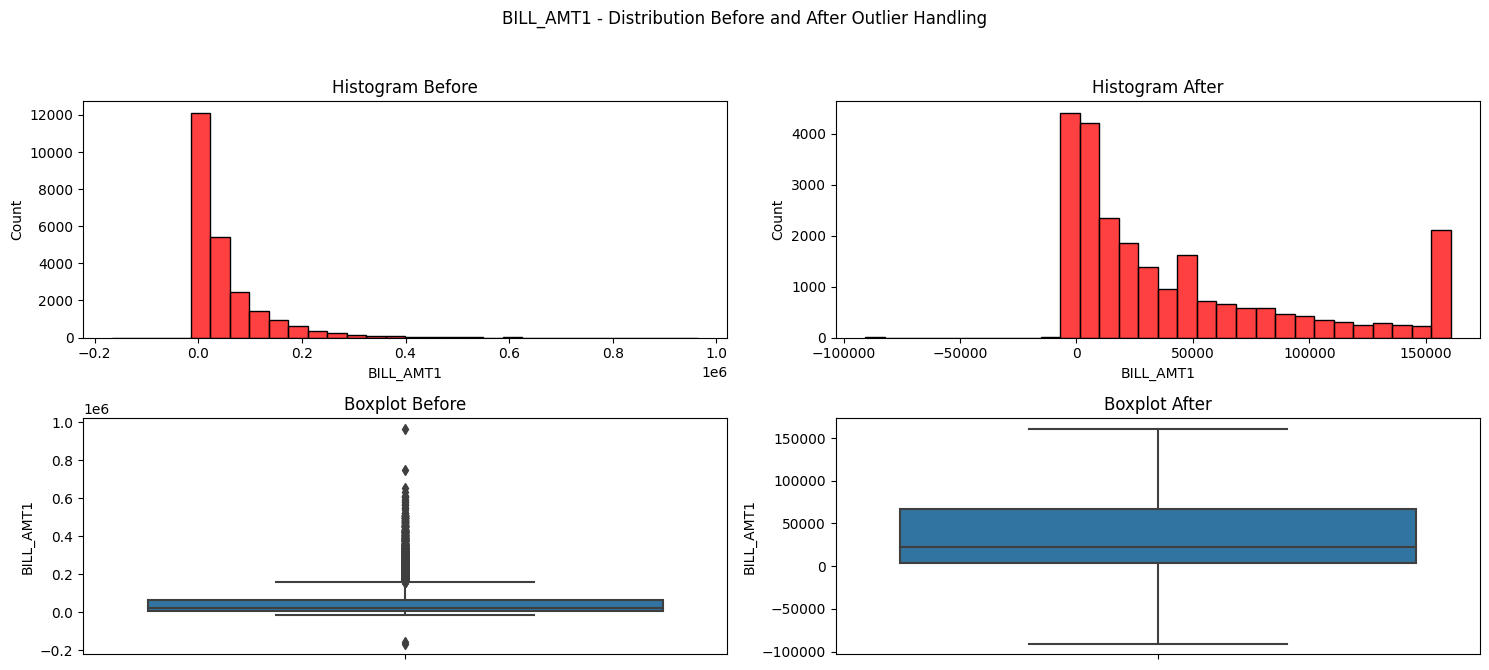

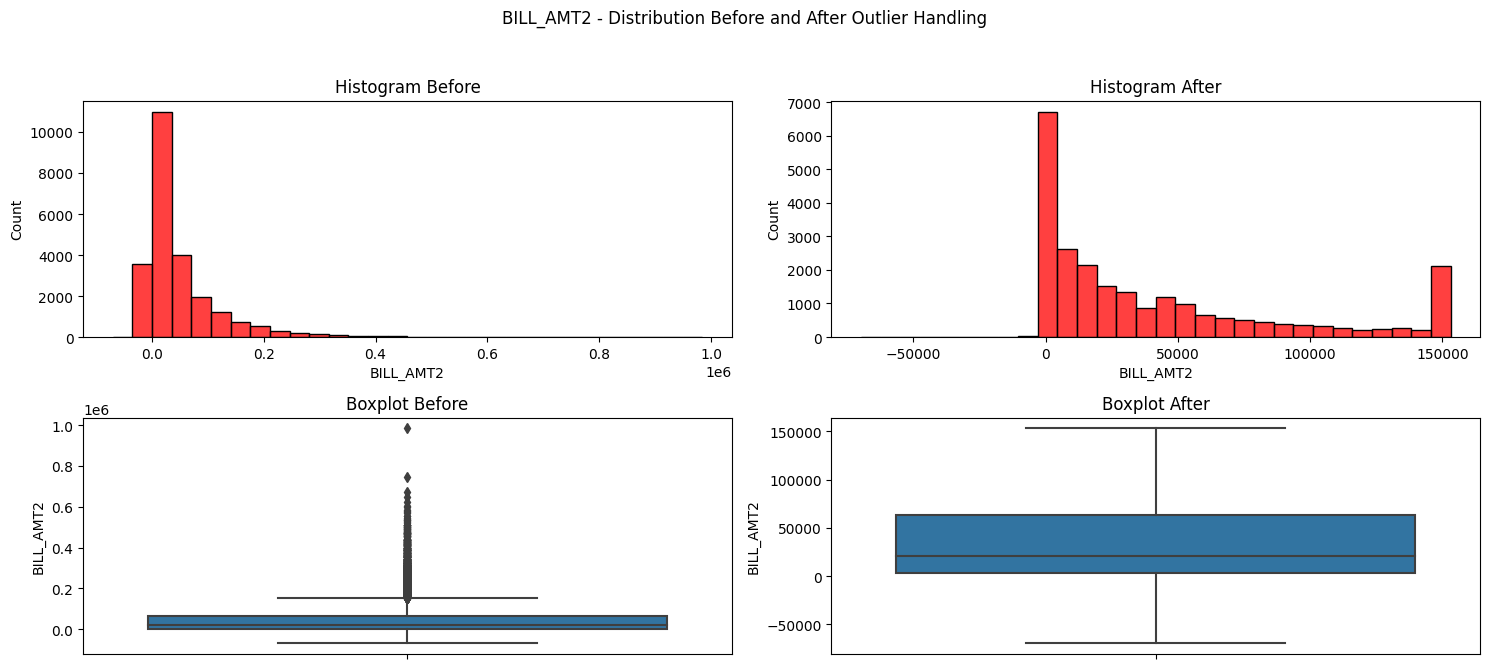

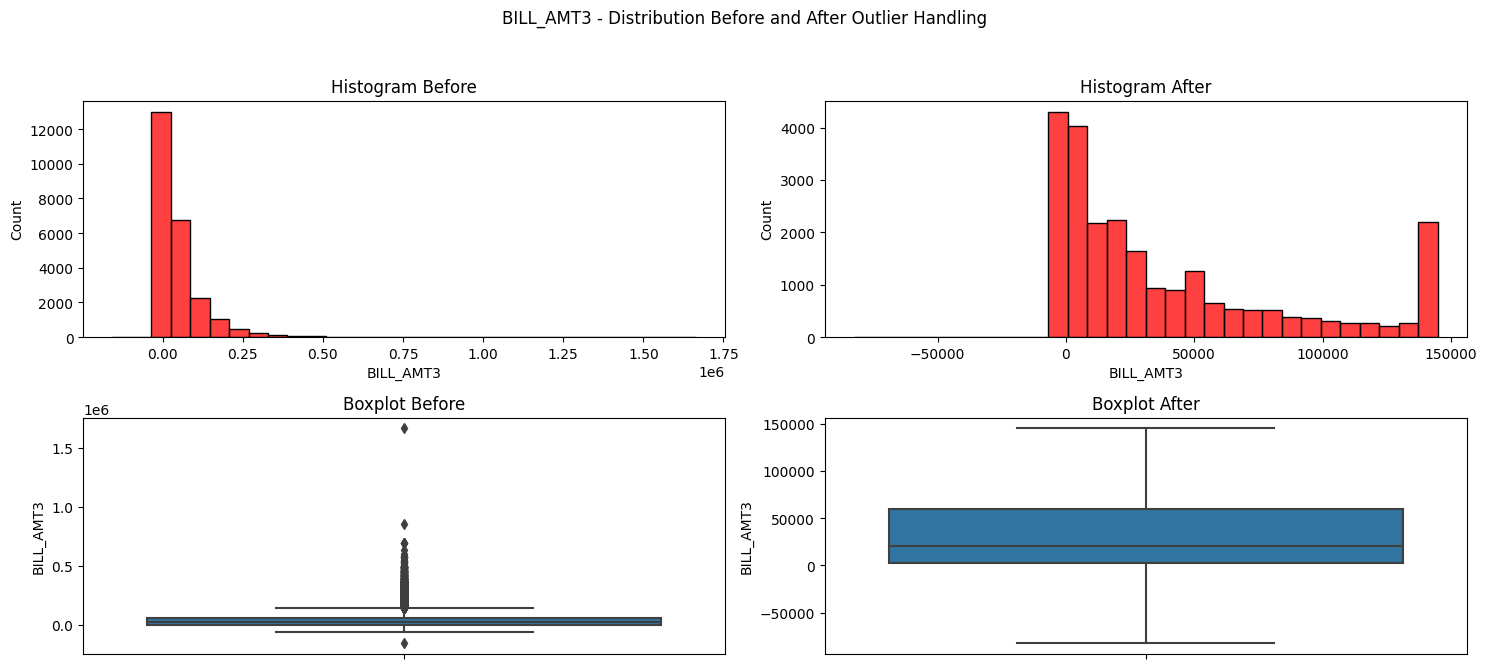

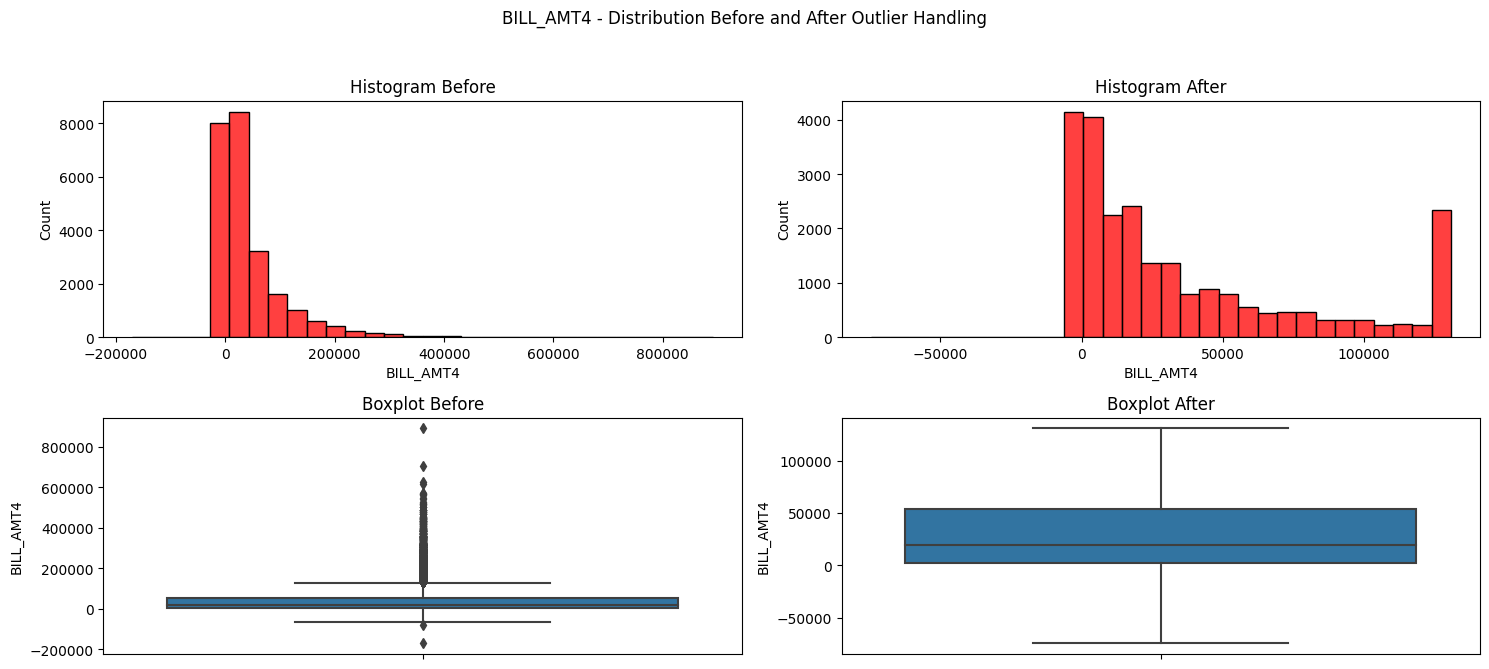

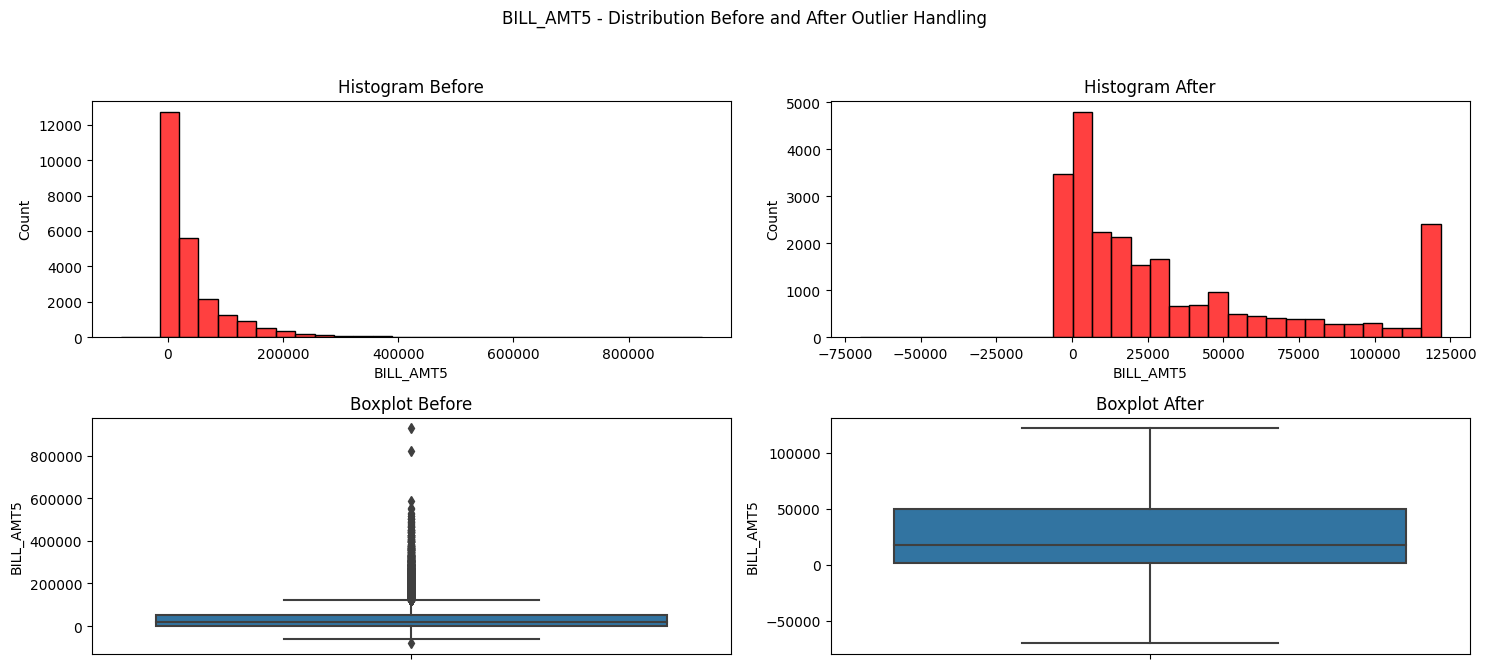

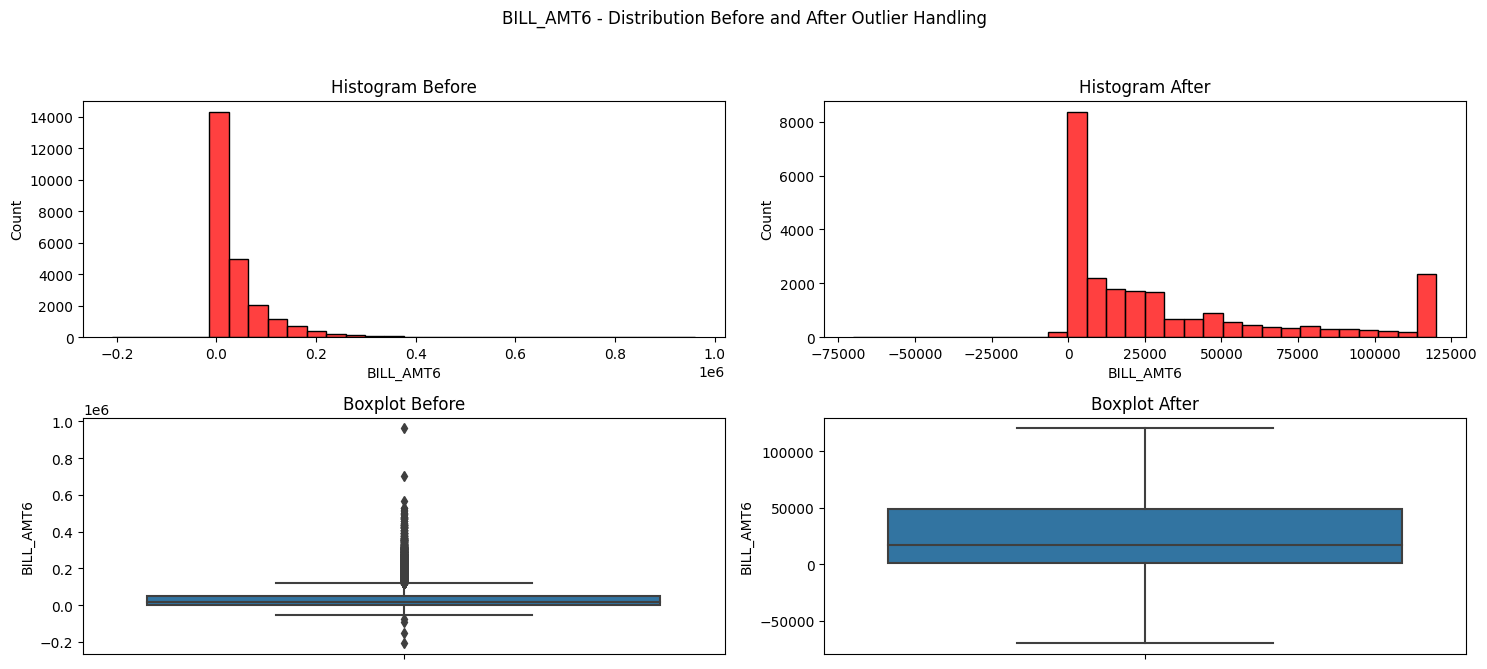

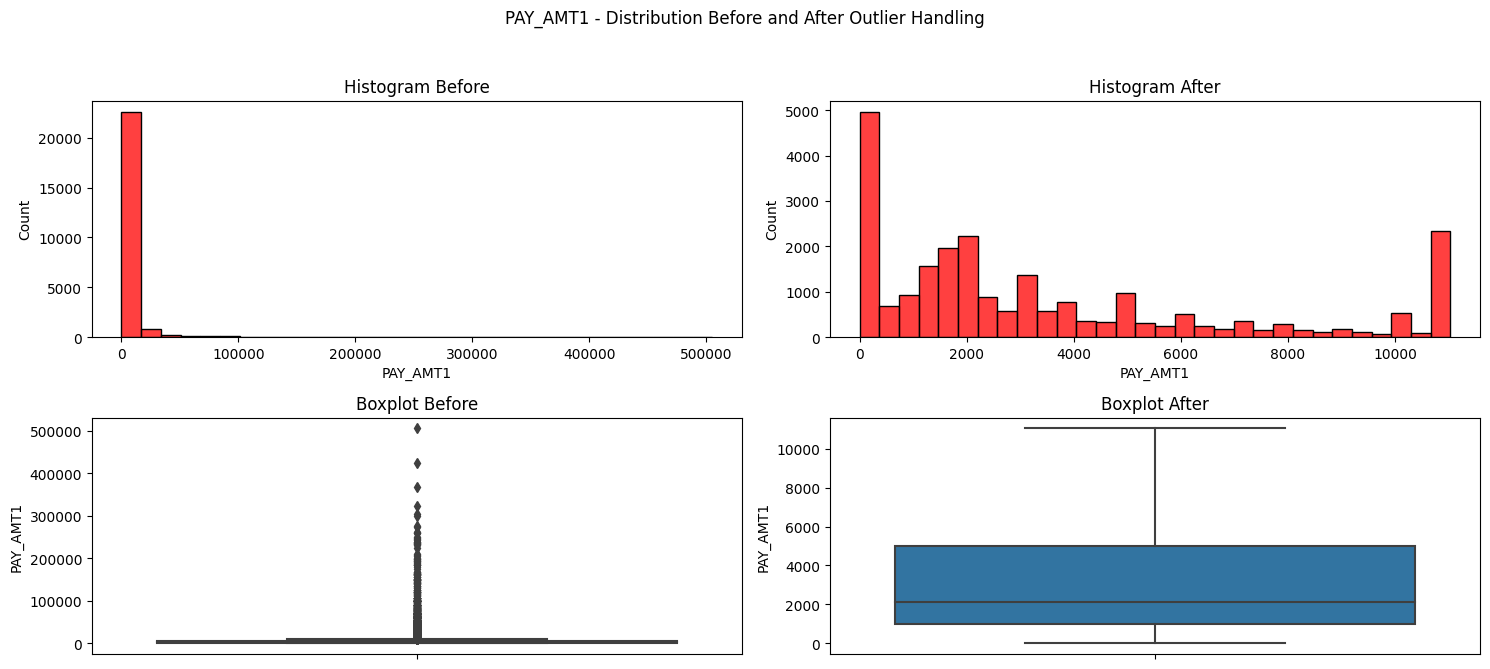

KeyboardInterrupt: 

In [28]:
# Plot perbandingan distribusi
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title berdasarkan variabel
    fig, axes = plt.subplots(2, 2, figsize=(15, 7))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='red')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='red')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    

# Looping utk menampilkan data
for i in winsor_cols:
    outlier_handling_plot_comparison(X_train, X_train_winsor, i)

In [ ]:
# Cek skewness & kurtosis data before winsorization
skewness = X_train.skew()
kurtosis = X_train.kurtosis()
stats_df = pd.DataFrame({'skewness': skewness, 'kurtosis': kurtosis})
stats_df.T

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAYMENT_RATIO,HAS_MISSED_PAYMENT
skewness,1.002460,-0.424065,0.972809,-0.022049,0.724191,0.734378,0.795644,0.843089,1.013930,1.021556,...,10.766075,30.725854,15.396111,11.951482,11.361729,10.130180,2.75728,8.22001,103.182903,0.056258
kurtosis,0.592238,-1.820321,2.120060,-1.354019,0.010637,2.678156,1.556089,2.074403,3.544478,4.057157,...,179.631330,1875.000637,449.114117,226.276500,187.500582,149.997247,10.88135,171.48160,11815.109231,-1.997002


In [ ]:
# Cek skewness & kurtosis data after winsorization
skewness = X_train_winsor.skew()
kurtosis = X_train_winsor.kurtosis()
stats_df2 = pd.DataFrame({'skewness': skewness, 'kurtosis': kurtosis})
stats_df2.T

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAYMENT_RATIO,HAS_MISSED_PAYMENT
skewness,0.906408,-0.424065,0.972809,-0.022049,0.724191,0.734378,0.795644,0.843089,1.013930,1.021556,...,1.033394,1.116372,1.204683,1.178012,1.190827,1.212744,1.171805,1.134956,1.204718,0.056258
kurtosis,0.084896,-1.820321,2.120060,-1.354019,0.010637,2.678156,1.556089,2.074403,3.544478,4.057157,...,-0.143944,0.057984,0.248123,0.152738,0.210175,0.264138,0.108355,0.059203,0.152601,-1.997002


## VI.d Scalling Numerical Column

In [ ]:
# Inisialisasi Scaler
scaler = MinMaxScaler()

# Scaling hanya kolom hasil winsor
X_train_scaled = scaler.fit_transform(X_train_winsor[winsor_cols])
X_test_scaled = scaler.transform(X_test_winsor[winsor_cols])

# Buat DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train[winsor_cols].columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train[winsor_cols].columns, index=X_test.index)

In [ ]:
# Before scalling
X_train[winsor_cols].head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAYMENT_RATIO
27356,340000,342299,339883,335659,336498,321941,315006,14000,13000,13000,12000,12000,12000,1991286,76000,0.038166
26408,240000,3922,2947,297,0,0,0,2947,297,0,0,0,0,7166,3244,0.452693
14125,210000,6608,3582,63527,32088,16731,62561,3582,63000,20000,5000,52343,15000,185097,158925,0.858604
12268,110000,109924,111805,108207,75808,78490,81238,6000,4380,3000,5000,10000,3000,565472,31380,0.055493
7075,50000,31199,36067,24727,30182,27043,25995,12009,2111,11000,1000,6000,6001,175213,38121,0.217569


In [ ]:
# After scalling
X_train_scaled_df.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAYMENT_RATIO
27356,0.640777,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.026325
26408,0.446602,0.376397,0.326352,0.364485,0.363741,0.365621,0.368274,0.267059,0.026353,0.000000,0.000000,0.000000,0.000000,0.008926,0.043910,0.312238
14125,0.388350,0.387078,0.329201,0.642577,0.519954,0.452799,0.697010,0.324604,1.000000,1.000000,0.522091,1.000000,1.000000,0.230566,1.000000,0.592209
12268,0.194175,0.797938,0.814856,0.839084,0.732794,0.774600,0.795150,0.543725,0.388642,0.281294,0.522091,1.000000,0.305173,0.704381,0.424756,0.038276
7075,0.077670,0.484870,0.474979,0.471931,0.510675,0.506531,0.504868,1.000000,0.187311,1.000000,0.104418,0.614565,0.610447,0.218254,0.516002,0.150065


In [ ]:
# Before scalling
X_test[winsor_cols].head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAYMENT_RATIO
29334,100000,9228,10240,11372,12092,12429,22315,1171,1303,1023,360,10000,442,77676,14299,0.184085
24426,150000,0,1003,1003,35206,36003,16854,1003,1003,35206,2000,18158,189000,90069,246370,2.735347
9822,20000,19363,19609,-391,19413,12223,2110,1200,160,20394,347,2110,12996,73109,37207,0.508925
20887,420000,100333,102906,105030,107146,107896,110149,5138,5267,5347,4019,4152,4173,633460,28096,0.044353
21692,100000,152330,66107,60734,48816,28679,30231,3000,2231,1617,1000,2000,590,386897,10438,0.026979


In [ ]:
# After scalling
X_test_scaled_df.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAYMENT_RATIO
29334,0.174757,0.397497,0.359079,0.413194,0.422608,0.430383,0.485531,0.106117,0.115617,0.095921,0.037591,1.000000,0.044962,0.096757,0.193550,0.126970
24426,0.271845,0.360800,0.317628,0.367590,0.535133,0.553218,0.456836,0.090893,0.088997,1.000000,0.208836,1.000000,1.000000,0.112195,1.000000,1.000000
9822,0.019417,0.437801,0.401123,0.361459,0.458249,0.429310,0.379361,0.108745,0.014197,1.000000,0.036233,0.216122,1.000000,0.091068,0.503630,0.351023
20887,0.796117,0.759797,0.774921,0.825111,0.885356,0.927822,0.947067,0.465609,0.467347,0.501360,0.419657,0.425279,0.424495,0.789070,0.380305,0.030592
21692,0.174757,0.966575,0.609785,0.630293,0.601390,0.515055,0.527127,0.271862,0.197959,0.151617,0.104418,0.204855,0.060017,0.481939,0.141288,0.018608


## VI.e Encoding Categorical Column


In [ ]:
# Kolom sesuai kebutuhan
onehot_cols = ['SEX', 'MARRIAGE']
ordinal_cols = ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [ ]:
# Inisialisasi encoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
orde = OrdinalEncoder()

# Fit-transform ke train
X_train_onehot = ohe.fit_transform(X_train[onehot_cols])
X_test_onehot = ohe.transform(X_test[onehot_cols])
X_train_ordinal = orde.fit_transform(X_train[ordinal_cols])
X_test_ordinal = orde.transform(X_test[ordinal_cols])

# Buat ohe jadi DataFrame
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=ohe.get_feature_names_out(onehot_cols), index=X_train.index)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=ohe.get_feature_names_out(onehot_cols), index=X_test.index)
# Buat ordinal jadi DataFrame
X_train_ordinal_df = pd.DataFrame(X_train_ordinal, columns=ordinal_cols, index=X_train.index)
X_test_ordinal_df = pd.DataFrame(X_test_ordinal, columns=ordinal_cols, index=X_test.index)

In [ ]:
# Before one hot encoding
X_train[onehot_cols].head()

,SEX,MARRIAGE
27356,1,2
26408,2,2
14125,2,2
12268,2,2
7075,2,3


In [ ]:
# After one hot encoding
X_train_onehot_df.head()

,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
27356,0.0,0.0,1.0,0.0
26408,1.0,0.0,1.0,0.0
14125,1.0,0.0,1.0,0.0
12268,1.0,0.0,1.0,0.0
7075,1.0,0.0,0.0,1.0


In [ ]:
# Before ordinal encoding
X_train[ordinal_cols].head()

,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
27356,1,0,0,0,0,0,0
26408,2,-1,-1,-1,-1,-2,-2
14125,1,0,-1,0,0,0,0
12268,2,2,0,0,0,0,0
7075,3,0,0,0,0,0,0


In [ ]:
# After ordinal encoding
X_train_ordinal_df.head()

,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
27356,1.0,2.0,2.0,2.0,2.0,2.0,2.0
26408,2.0,1.0,1.0,1.0,1.0,0.0,0.0
14125,1.0,2.0,1.0,2.0,2.0,2.0,2.0
12268,2.0,4.0,2.0,2.0,2.0,2.0,2.0
7075,3.0,2.0,2.0,2.0,2.0,2.0,2.0


## VI.f Concat Data

In [ ]:
# Gabungkan data yang sudah di scalling dan encoding
X_train_final = pd.concat([
    X_train_scaled_df,                    # numerikal scaled
    X_train[['AGE', 'HAS_MISSED_PAYMENT']],  # untouched numeric/boolean
    X_train_onehot_df,                    # one-hot encoded
    X_train_ordinal_df                    # ordinal encoded
], axis=1)

X_test_final = pd.concat([
    X_test_scaled_df,
    X_test[['AGE', 'HAS_MISSED_PAYMENT']],
    X_test_onehot_df,
    X_test_ordinal_df
], axis=1)
# Cek hasil akhir
X_train_final.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
27356,0.640777,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
26408,0.446602,0.376397,0.326352,0.364485,0.363741,0.365621,0.368274,0.267059,0.026353,0.000000,...,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
14125,0.388350,0.387078,0.329201,0.642577,0.519954,0.452799,0.697010,0.324604,1.000000,1.000000,...,0.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0
12268,0.194175,0.797938,0.814856,0.839084,0.732794,0.774600,0.795150,0.543725,0.388642,0.281294,...,0.0,1.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0
7075,0.077670,0.484870,0.474979,0.471931,0.510675,0.506531,0.504868,1.000000,0.187311,1.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0


## VI.g Balancing Data

In [ ]:
print("Before SMOTE:")
print(y_train.value_counts(normalize=True))

Before SMOTE:
default payment next month
0    0.778492
1    0.221508
Name: proportion, dtype: float64


In [ ]:
# Define smote
# smote = SMOTE(random_state=42)
smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=5)
X_train_final, y_train_final = smote.fit_resample(X_train_final, y_train)

In [ ]:
print("After SMOTE:")
print(y_train_final.value_counts(normalize=True))

After SMOTE:
default payment next month
0    0.5
1    0.5
Name: proportion, dtype: float64


## VI.h Pipeline

In [ ]:
# Pipeline untuk handling outlier
numeric_pipeline = make_pipeline(
    Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=winsor_cols),
    MinMaxScaler()
)

# # Column transformer
# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_pipeline, winsor_cols),
#     ('ord', OrdinalEncoder(), ordinal_cols),
#     ('ohe', OneHotEncoder(drop='first', sparse_output=False), onehot_cols)
# ], remainder='passthrough')

# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, winsor_cols),
    ('ord', OrdinalEncoder(
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ), ordinal_cols),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore'), onehot_cols)
], remainder='passthrough')

# ohe = OneHotEncoder(drop='first', sparse_output=False)

pipeline = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced', max_depth=10, n_estimators=100)) # model baseline
        # ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]
)

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['LIMIT_BAL',
                                                                                         'BILL_AMT1',
                                                                                         'BILL_AMT2',
                                                                                         'BILL_AMT3',
                                                                                         'BILL_AMT4',
                                                                                         'BILL_AMT5',
                                                                                         'BILL_AMT6',
                                                                                         'PAY_AMT1',
                                                                                         'PAY_AMT2',
                                                                                         'PAY_AMT3',
                                                                                         'PAY_AMT4',
                                                                                         'PAY_AMT5',
                                                                                         'PAY_AMT6',
                                                                                         'TOTAL_BILL...
                                                   'PAY_AMT6', 'TOTAL_BILL_AMT',
                                                   'TOTAL_PAY_AMT',
                                                   'PAYMENT_RATIO']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['EDUCATION', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['SEX', 'MARRIAGE'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_jobs=-1, random_state=42))])

In [ ]:
# Fit pipeline 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['LIMIT_BAL',
                                                                                         'BILL_AMT1',
                                                                                         'BILL_AMT2',
                                                                                         'BILL_AMT3',
                                                                                         'BILL_AMT4',
                                                                                         'BILL_AMT5',
                                                                                         'BILL_AMT6',
                                                                                         'PAY_AMT1',
                                                                                         'PAY_AMT2',
                                                                                         'PAY_AMT3',
                                                                                         'PAY_AMT4',
                                                                                         'PAY_AMT5',
                                                                                         'PAY_AMT6',
                                                                                         'TOTAL_BILL...
                                                   'PAY_AMT6', 'TOTAL_BILL_AMT',
                                                   'TOTAL_PAY_AMT',
                                                   'PAYMENT_RATIO']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['EDUCATION', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['SEX', 'MARRIAGE'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_jobs=-1, random_state=42))])

In [ ]:
# Cek hasil predict dari model baseline
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[4111  562]
 [ 615  705]]
              precision    recall  f1-score   support

           0     0.8699    0.8797    0.8748      4673
           1     0.5564    0.5341    0.5450      1320

    accuracy                         0.8036      5993
   macro avg     0.7132    0.7069    0.7099      5993
weighted avg     0.8008    0.8036    0.8021      5993



Prediksi menggunakan model baseline masih kurang dalam memprediksi orang yang akan gagal bayar

# VII. Model Selection & Training

## VII.a SVC

In [ ]:
# Ganti classifier di pipeline dengan SVC
pipeline.set_params(classifier=SVC(kernel='rbf', random_state=42))

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['LIMIT_BAL',
                                                                                         'BILL_AMT1',
                                                                                         'BILL_AMT2',
                                                                                         'BILL_AMT3',
                                                                                         'BILL_AMT4',
                                                                                         'BILL_AMT5',
                                                                                         'BILL_AMT6',
                                                                                         'PAY_AMT1',
                                                                                         'PAY_AMT2',
                                                                                         'PAY_AMT3',
                                                                                         'PAY_AMT4',
                                                                                         'PAY_AMT5',
                                                                                         'PAY_AMT6',
                                                                                         'TOTAL_BILL...
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6', 'TOTAL_BILL_AMT',
                                                   'TOTAL_PAY_AMT',
                                                   'PAYMENT_RATIO']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['EDUCATION', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['SEX', 'MARRIAGE'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', SVC(random_state=42))])

In [ ]:
# Cek hasil predict
y_pred_svc = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc, digits=4))


[[3909  764]
 [ 608  712]]
              precision    recall  f1-score   support

           0     0.8654    0.8365    0.8507      4673
           1     0.4824    0.5394    0.5093      1320

    accuracy                         0.7711      5993
   macro avg     0.6739    0.6880    0.6800      5993
weighted avg     0.7810    0.7711    0.7755      5993



In [ ]:
# Coba model manual tanpa pipeline

# Inisialisasi model
svc_manual = SVC(kernel='rbf', random_state=42)

# Training pakai hasil manual (sudah preprocessing + SMOTE)
svc_manual.fit(X_train_final, y_train_final)

# Prediksi
y_pred_manual = svc_manual.predict(X_test_final)

# Evaluasi
print(confusion_matrix(y_test, y_pred_manual))
print(classification_report(y_test, y_pred_manual, digits=4))

[[3951  722]
 [ 624  696]]
              precision    recall  f1-score   support

           0     0.8636    0.8455    0.8545      4673
           1     0.4908    0.5273    0.5084      1320

    accuracy                         0.7754      5993
   macro avg     0.6772    0.6864    0.6814      5993
weighted avg     0.7815    0.7754    0.7782      5993



## VII.b XGBoost

In [ ]:
# Ubah classifier di pipeline ke XGBoost
pipeline.set_params(classifier=XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss',  # Hindari warning
    scale_pos_weight=3,  # Sesuaikan dengan proporsi kelas
))

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['LIMIT_BAL',
                                                                                         'BILL_AMT1',
                                                                                         'BILL_AMT2',
                                                                                         'BILL_AMT3',
                                                                                         'BILL_AMT4',
                                                                                         'BILL_AMT5',
                                                                                         'BILL_AMT6',
                                                                                         'PAY_AMT1',
                                                                                         'PAY_AMT2',
                                                                                         'PAY_AMT3',
                                                                                         'PAY_AMT4',
                                                                                         'PAY_AMT5',
                                                                                         'PAY_AMT6',
                                                                                         'TOTAL_BILL...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Cek hasil predict dari model
y_pred_xgb = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=4))

[[3567 1106]
 [ 511  809]]
              precision    recall  f1-score   support

           0     0.8747    0.7633    0.8152      4673
           1     0.4225    0.6129    0.5002      1320

    accuracy                         0.7302      5993
   macro avg     0.6486    0.6881    0.6577      5993
weighted avg     0.7751    0.7302    0.7458      5993



## VII.c Random Forest

In [ ]:
# Ubah classifier di pipeline ke RandomForest
pipeline.set_params(classifier=RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample',
    max_depth=10,
    n_estimators=100
))

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['LIMIT_BAL',
                                                                                         'BILL_AMT1',
                                                                                         'BILL_AMT2',
                                                                                         'BILL_AMT3',
                                                                                         'BILL_AMT4',
                                                                                         'BILL_AMT5',
                                                                                         'BILL_AMT6',
                                                                                         'PAY_AMT1',
                                                                                         'PAY_AMT2',
                                                                                         'PAY_AMT3',
                                                                                         'PAY_AMT4',
                                                                                         'PAY_AMT5',
                                                                                         'PAY_AMT6',
                                                                                         'TOTAL_BILL...
                                                   'PAY_AMT6', 'TOTAL_BILL_AMT',
                                                   'TOTAL_PAY_AMT',
                                                   'PAYMENT_RATIO']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['EDUCATION', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['SEX', 'MARRIAGE'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=10, n_jobs=-1,
                                        random_state=42))])

In [ ]:
# Cek hasil predict dari model
y_pred_rf = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))

[[4118  555]
 [ 627  693]]
              precision    recall  f1-score   support

           0     0.8679    0.8812    0.8745      4673
           1     0.5553    0.5250    0.5397      1320

    accuracy                         0.8028      5993
   macro avg     0.7116    0.7031    0.7071      5993
weighted avg     0.7990    0.8028    0.8008      5993



## VII.d KNN

In [ ]:
# Ubah classifier di pipeline ke KNeighbors
pipeline.set_params(classifier=KNeighborsClassifier(
    n_neighbors=5,
    n_jobs=-1
))

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['LIMIT_BAL',
                                                                                         'BILL_AMT1',
                                                                                         'BILL_AMT2',
                                                                                         'BILL_AMT3',
                                                                                         'BILL_AMT4',
                                                                                         'BILL_AMT5',
                                                                                         'BILL_AMT6',
                                                                                         'PAY_AMT1',
                                                                                         'PAY_AMT2',
                                                                                         'PAY_AMT3',
                                                                                         'PAY_AMT4',
                                                                                         'PAY_AMT5',
                                                                                         'PAY_AMT6',
                                                                                         'TOTAL_BILL...
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6', 'TOTAL_BILL_AMT',
                                                   'TOTAL_PAY_AMT',
                                                   'PAYMENT_RATIO']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['EDUCATION', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['SEX', 'MARRIAGE'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', KNeighborsClassifier(n_jobs=-1))])

In [ ]:
# Cek hasil predict dari model
y_pred_knn = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, digits=4))

[[3217 1456]
 [ 528  792]]
              precision    recall  f1-score   support

           0     0.8590    0.6884    0.7643      4673
           1     0.3523    0.6000    0.4439      1320

    accuracy                         0.6689      5993
   macro avg     0.6057    0.6442    0.6041      5993
weighted avg     0.7474    0.6689    0.6938      5993



# VIII. Model Evaluation

In [ ]:
# Tempat nyimpen hasil evaluasi
model_results = []

# Fungsi evaluasi
def evaluate_model(name, y_true, y_pred):
    model_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Class 1)': precision_score(y_true, y_pred),
        'Recall (Class 1)': recall_score(y_true, y_pred),
        'F1 Score (Class 1)': f1_score(y_true, y_pred)
    })

evaluate_model('SVC', y_test, y_pred_manual)  # SVC manual
evaluate_model('XGBoost', y_test, y_pred_xgb)
evaluate_model('Random Forest', y_test, y_pred_rf)
evaluate_model('KNeighbors', y_test, y_pred_knn)

In [ ]:
# Display
results_df = pd.DataFrame(model_results)
results_df

,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1)
0,SVC,0.775405,0.490832,0.527273,0.508400
1,XGBoost,0.730185,0.422454,0.612879,0.500155
2,Random Forest,0.802770,0.555288,0.525000,0.539720
3,KNeighbors,0.668947,0.352313,0.600000,0.443946


🧠 Insight per Model

 ✅ Random Forest (Best Overall)
- **F1-score tertinggi** (0.540) → performa paling seimbang antara precision dan recall.
- Precision paling tinggi → meminimalkan false positive.
- Cocok untuk model baseline saat ini.

 ⚖️ SVC
- Recall (0.527) mirip dengan Random Forest.
- F1-score solid (0.508), tapi sedikit di bawah Random Forest.
- Cocok jika ingin model yang simpel tapi tetap powerful.

 🎯 XGBoost
- **Recall tertinggi** (0.613) → sangat baik dalam menangkap kasus default.
- Precision rendah → banyak false positive.
- Cocok jika bisnis lebih fokus pada mendeteksi *semua* potensi gagal bayar, meskipun ada false alarm.

 🧊 K-Nearest Neighbors
- Performa terendah di semua metrik.
- Kemungkinan kurang cocok untuk dataset ini.
- Bisa diabaikan kecuali ingin melakukan tuning lebih lanjut.

---

🏁 Kesimpulan
- **Random Forest** adalah model terbaik saat ini dari sisi F1-score dan keseimbangan metrik lainnya.
- Jika fokus utama adalah **recall**, XGBoost layak dipertimbangkan dengan tuning tambahan.
- **KNN tidak direkomendasikan** untuk digunakan lebih lanjut.


# IX. Hyperparameter Tuning

In [ ]:
# Set classifier di pipeline ke RandomForest
pipeline.set_params(classifier=RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample',
    max_depth=10,
    n_estimators=100
))

# Definisikan parameter grid untuk pencarian hyperparameter
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}


# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=2,
    error_score='raise'  # Raise error if any
)

In [ ]:
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


: 

: 

In [ ]:
# Simpan model terbaik
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluasi model terbaik
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, digits=4))

# Additional

In [ ]:
end_time = time.time()
total_seconds = end_time - start_time
minutes = int(total_seconds // 60)
seconds = int(total_seconds % 60)
print(f"Total waktu eksekusi semua cell: {minutes} menit {seconds} detik")


Total waktu eksekusi semua cell: 219.51 detik
